# **Análisis de Datos de Energía Global (2000 - 2024)**

**Autor:** Juan Manuel Martínez Estrada  
**Fecha de creación:** 2025-04-19  
**Versión:** 1.0

---
*Este notebook analiza las tendencias globales en el consumo de energía, la adopción de energías renovables, las emisiones de carbono y otros factores relacionados, utilizando datos a nivel de país desde el año 2000 hasta 2024.*

---

# Índice

1. [Configuración Inicial](#1-configuración-inicial)
    1. [Importación de Librerías](#11-importación-de-librerías)
    2. [Configuraciones Globales](#12-configuraciones-globales)
    3. [Definición de Rutas](#13-definición-de-rutas)
    4. [Carga de Datos Crudos](#14-carga-de-datos-crudos)

2. [Exploración Inicial de Datos (EDA)](#2-exploración-inicial-de-datos-eda)
    1. [Visión General del Dataset](#21-visión-general-del-dataset)
    2. [Análisis de la Estructura Temporal y Geografica](#22-análisis-de-la-estructura-temporal-y-geografica)

3. [Estadística Descriptiva y Distribución de los Datos](#3-estadística-descriptiva-y-distribución-de-los-datos)
    1. [Histograma y KDE plot de Total Energy Consumption (TWh)](#31-histograma-y-kde-plot-de-total-energy-consumption-twh)
    2. [Histograma y KDE plot de Per Capita Energy Use (kWh)](#32--histograma-y-kde-plot-de-per-capita-energy-use-kwh)
    3. [Histograma y KDE plot de Renewable Energy Share (%)](#33-histograma-y-kde-plot-de-renewable-energy-share-)
    4. [Histograma y KDE plot de Fossil Fuel Dependency (%)](#34-histograma-y-kde-plot-de-fossil-fuel-dependency-)
    5. [Histograma y KDE plot de Carbon Emissions (Million Tons)](#35-histograma-y-kde-plot-de-carbon-emissions-million-tons)
    6. [Histograma y KDE plot de Energy Price Index (USD/kWh)](#36-histograma-y-kde-plot-de-energy-price-index-usdkwh)
    7. [Boxplots comparativos por país para todas las variables anteriores](#37-boxplots-comparativos-por-país-para-todas-las-variables-anteriores)
    8. [Casos Destacados: Países en los Extremos del Espectro Energético](#38-casos-destacados-países-en-los-extremos-del-espectro-energético)

4. [Análisis de Fuentes de Energía: Implicaciones en las Emisiones de C02](#4-análisis-de-fuentes-de-energía-implicaciones-en-las-emisiones-de-co2)
    1. [Evolución de Energías Renovables](#41-evolución-de-energías-renovables)
    2. [Evolución de la Dependencia de los Combustibles Fósiles](#42-evolución-de-la-dependencia-de-los-combustibles-fósiles)
    3. [Evolución del Consumo de Energía Per Capita](#43-evolución-del-consumo-de-energía-per-capita)
    4. [Evolución del Consumo de Energía Total](#44-evolución-del-consumo-de-energía-total)
    5. [Comparativa entre los Tipos de Energías por País](#45-comparativa-entre-los-tipos-de-energías-por-país)
    6. [Distribución del Consumo de Energía respecto de las Emisiones de Carbon por País](#46-distribución-del-consumo-de-energía-respecto-de-las-emisiones-de-carbon-por-país)
    7. [Correlación entre Fuentes y Consumo](#47-correlación-entre-fuentes-y-consumo)

5. [Distribución del Consumo Energético por Sector y su Vínculo con la Transición Energética](#5-distribución-del-consumo-energético-por-sector-y-su-vínculo-con-la-transición-energética)
    1. [Distribución del Consumo Energético por Sector](#51-distribución-del-consumo-energético-por-sector)
    2. [Relación con la Dependencia de Combustibles Fósiles y Energías Renovables](#52-relación-con-la-dependencia-de-combustibles-fósiles-y-energías-renovables)
    3. [Análisis de Tendencias a lo Largo del Tiempo por Sector](#53-análisis-de-tendencias-a-lo-largo-del-tiempo-por-sector)
    4. [Análisis de la Proporción del Consumo Energético por Sector en cada País](#54-análisis-de-la-proporción-del-consumo-energético-por-sector-en-cada-país)

6. [Conclusiones](#6-conclusiones)

7. [Referencias](#7-referencias)

## 1. Configuración Inicial

#### 1.1. Importación de Librerías

In [1]:
# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Añadir la carpeta raíz del proyecto a sys.path
sys.path.append(os.path.abspath('..'))
import src.visualizaciones as viz
import src.procesamiento_datos as pro

#### 1.2. Configuraciones Globales

In [2]:
# --- Configuración Visual (Recomendado) ---
pd.set_option('display.max_columns', None) # Para mostrar todas las columnas
pd.set_option('display.float_format', '{:.2f}'.format) # Formato de decimales
sns.set_style('whitegrid')
sns.set_palette("deep")
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño de gráficos por defecto

#### 1.3. Definición de Rutas

In [3]:
import os

# Definiendo el path o ruta hacia el dataset original
data_path = os.path.join('..', 'data', 'dataset_original', 'global_energy_consumption.csv')

# Definiendo el path o ruta hacia el dataset procesado
# data_processed_path = os.path.join('..', 'data', 'dataset_limpio', 'global_energy_consumption_clean.csv')



#### 1.4. Carga de Datos Crudos

In [4]:
# Convirtiendo el dataset en un dataframe de pandas
df = pd.read_csv(data_path)

# Creando una copia del dataframe original
df_copy = df.copy()

## 2. Exploración Inicial de Datos (EDA)

#### 2.1. Visión General del Dataset

In [5]:
# Dimensiones del dataset
print("Dimensiones del dataset: ", df.shape)

Dimensiones del dataset:  (10000, 10)


In [6]:
# Ver las primeras filas
df.head(10)

Country  Year  Total Energy Consumption (TWh)  Per Capita Energy Use (kWh)  \
0   Canada  2018                         9525.38                     42301.43   
1  Germany  2020                         7922.08                     36601.38   
2   Russia  2002                         6630.01                     41670.20   
3   Brazil  2010                         8580.19                     10969.58   
4   Canada  2006                          848.88                     32190.85   
5       UK  2016                         4682.02                      2491.92   
6    India  2024                         9893.64                      3912.56   
7   Canada  2008                         7719.04                     35819.59   
8   Russia  2020                         9624.55                      1708.80   
9   Brazil  2008                         7818.38                     29198.37   

   Renewable Energy Share (%)  Fossil Fuel Dependency (%)  \
0                       13.70                       70.47   
1                       33.63                       41.95   
2                       10.82                       39.32   
3                       73.24                       16.71   
4                       73.60                       74.86   
5                       40.47                       69.06   
6                       27.07                       31.70   
7                       15.03                       62.73   
8                       77.36                       63.39   
9                       79.59                       25.95   

   Industrial Energy Use (%)  Household Energy Use (%)  \
0                      45.18                     19.96   
1                      34.32                     22.27   
2                      53.66                     26.44   
3                      30.55                     27.60   
4                      42.39                     23.43   
5                      20.07                     23.39   
6                      57.59                     18.56   
7                      57.93                     21.51   
8                      48.42                     24.01   
9                      36.93                     27.93   

   Carbon Emissions (Million Tons)  Energy Price Index (USD/kWh)  
0                          3766.11                          0.12  
1                          2713.12                          0.08  
2                           885.98                          0.26  
3                          1144.11                          0.47  
4                           842.39                          0.48  
5                          2242.11                          0.35  
6                          3626.50                          0.13  
7                          3808.66                          0.05  
8                           525.95                          0.20  
9                          2504.76                          0.11

In [7]:
df.tail(10)

Country  Year  Total Energy Consumption (TWh)  \
9990   Russia  2007                         1810.04   
9991  Germany  2023                          753.46   
9992   Canada  2000                         8011.53   
9993  Germany  2002                         1658.77   
9994   Brazil  2004                         1946.42   
9995   Canada  2017                         9786.50   
9996       UK  2011                         7200.88   
9997    India  2011                         2579.82   
9998       UK  2020                         5950.39   
9999   Brazil  2018                         5387.71   

      Per Capita Energy Use (kWh)  Renewable Energy Share (%)  \
9990                     24458.92                       60.44   
9991                     23248.14                       20.13   
9992                     34726.50                       74.39   
9993                       631.72                       68.79   
9994                     29544.63                       52.69   
9995                     30481.07                       14.87   
9996                     37402.75                       89.00   
9997                     44516.91                       46.65   
9998                     22289.39                       43.43   
9999                     17454.75                       89.62   

      Fossil Fuel Dependency (%)  Industrial Energy Use (%)  \
9990                       33.84                      21.25   
9991                       52.28                      55.68   
9992                       59.86                      37.91   
9993                       40.13                      27.11   
9994                       23.54                      29.57   
9995                       70.25                      53.93   
9996                       16.55                      24.35   
9997                       68.06                      57.01   
9998                       68.57                      34.94   
9999                       49.97                      30.04   

      Household Energy Use (%)  Carbon Emissions (Million Tons)  \
9990                     17.39                          1912.59   
9991                     31.25                          2537.40   
9992                     26.98                          2957.43   
9993                     22.11                          3725.05   
9994                     11.56                           167.00   
9995                     19.94                           620.85   
9996                     20.57                           830.73   
9997                     33.73                           993.78   
9998                     25.40                           199.85   
9999                     37.96                          4606.33   

      Energy Price Index (USD/kWh)  
9990                          0.28  
9991                          0.19  
9992                          0.35  
9993                          0.28  
9994                          0.23  
9995                          0.29  
9996                          0.48  
9997                          0.08  
9998                          0.47  
9999                          0.11

### Hallazgos Clave:

#### Basado en las primeras 10 filas proporcionadas, este dataset contiene información sobre indicadores energéticos de varios países en diferentes años.

#### **Columnas y sus mediciones**

#### El análisis inicial del dataset revela las características fundamentales de las variables consideradas a lo largo del período comprendido entre **2002 y 2024**, abarcando una selección de países clave: **Canadá, Alemania, Rusia, Brasil, Reino Unido e India**. La variable categórica "Country" permite identificar la nación específica a la que corresponden los registros anuales indicados en la columna numérica "Year". En términos de consumo energético, se cuantifica tanto el "Total Energy Consumption" en TWh, reflejando la demanda energética agregada a nivel nacional, como el "Per Capita Energy Use" en kWh, que ofrece una perspectiva del consumo individualizado. La composición de la matriz energética se detalla a través del "Renewable Energy Share", expresado como porcentaje del total, y la contraparte, el "Fossil Fuel Dependency", que indica la proporción de energía proveniente de combustibles fósiles. El destino del consumo energético se desglosa en el porcentaje correspondiente al "Industrial Energy Use" y al "Household Energy Use", señalando la distribución entre sectores productivos y domésticos. Finalmente, se incluyen dos indicadores cruciales con implicaciones ambientales y económicas: las "Carbon Emissions", medidas en millones de toneladas, y el "Energy Price Index", expresado en dólares por USD/kWh.

In [8]:
# Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
# Resumen estadístico
df.describe().T

count     mean      std     min      25%  \
Year                            10000.00  2012.15     7.16 2000.00  2006.00   
Total Energy Consumption (TWh)  10000.00  5142.56  2848.75  100.48  2713.88   
Per Capita Energy Use (kWh)     10000.00 25039.95 14205.66  500.27 12683.22   
Renewable Energy Share (%)      10000.00    47.32    24.60    5.00    26.11   
Fossil Fuel Dependency (%)      10000.00    44.93    20.20   10.01    27.34   
Industrial Energy Use (%)       10000.00    40.06    11.54   20.00    30.22   
Household Energy Use (%)        10000.00    25.04     8.60   10.00    17.61   
Carbon Emissions (Million Tons) 10000.00  2536.15  1424.11   50.64  1293.33   
Energy Price Index (USD/kWh)    10000.00     0.27     0.13    0.05     0.16   

                                     50%      75%      max  
Year                             2012.00  2018.00  2024.00  
Total Energy Consumption (TWh)   5190.85  7579.98  9999.26  
Per Capita Energy Use (kWh)     25098.77 37113.28 49989.57  
Renewable Energy Share (%)         47.15    68.68    90.00  
Fossil Fuel Dependency (%)         45.11    62.43    80.00  
Industrial Energy Use (%)          39.98    50.15    60.00  
Household Energy Use (%)           25.09    32.57    40.00  
Carbon Emissions (Million Tons)  2568.01  3766.18  4999.34  
Energy Price Index (USD/kWh)        0.27     0.39     0.50

### Hallazgos Clave:

#### En el análisis general del conjunto de datos, se destaca una tendencia promedio hacia un mayor predominio de las **energías renovables** en comparación con las fuentes basadas en **combustibles fósiles** a lo largo del tiempo, con medias que alcanzan el **47.32%** y el **44.93%** respectivamente. Sin embargo, al observar la variabilidad en el **consumo energético**, tanto a nivel **total** como **per cápita**, se muestra una gran diferencia entre los países. La desviación estándar del consumo total de energía, situada en **2848.75 TWh**, supera ligeramente la mitad de su media de **5142.56 TWh**, indicando una dispersión considerable en la demanda energética entre los países y a lo largo de los años. Esta variabilidad se intensifica aún más al examinar el consumo per cápita, donde la desviación estándar de **14205.66 kWh** excede la mitad de la media de **25039.95 kWh**, lo que subraya profundas desigualdades en los patrones de uso energético individual a escala global.

In [10]:
# Cantidad de datos por país
df['Country'].value_counts()

Country
USA          1053
UK           1034
Australia    1021
Canada       1017
India         996
Japan         994
China         985
Germany       971
Russia        967
Brazil        962
Name: count, dtype: int64

In [11]:
# Cantidad de datos por año
df['Year'].value_counts()

Year
2014    450
2020    430
2018    428
2015    428
2012    419
2007    414
2017    413
2016    412
2009    408
2019    407
2021    403
2023    403
2011    400
2003    400
2013    399
2022    397
2006    394
2001    393
2005    392
2008    384
2000    380
2024    376
2004    374
2002    372
2010    324
Name: count, dtype: int64

### Hallazgos Clave:

#### La evidente variación en la cantidad de datos según el país y el año de registro es un aspecto destacado de este análisis. ¿Podría esta diferencia reflejar distintos niveles de transparencia en la provisión de datos, inversiones variables en su recolección, o incluso diferentes períodos de inicio en el seguimiento de las políticas energéticas?

In [12]:
# Verificar valores nulos
df.isna().sum()

Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64

#### 2.2. Análisis de la Estructura Temporal y Geografica

In [13]:
# Distribución de países en el dataset
print(f"Número total de países: {df['Country'].nunique()}\n")
# Paises en el dataset
print(f"Paises en el dataset: {df['Country'].unique()}")

Número total de países: 10

Paises en el dataset: ['Canada' 'Germany' 'Russia' 'Brazil' 'UK' 'India' 'Australia' 'China'
 'USA' 'Japan']


In [14]:
# Distribución por años
años_disponibles = df['Year'].unique()
print(f"\nAños disponibles: {sorted(años_disponibles)}")
print(f"\nPeríodo de tiempo: {min(años_disponibles)} - {max(años_disponibles)}")


Años disponibles: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

Período de tiempo: 2000 - 2024


## 3. Estadística Descriptiva y Distribución de los Datos

### **Hipótesis**: Los países con medianas más altas en consumo total y per cápita de energía están directamente relacionados con niveles más altos de industrialización, urbanización e infraestructura energética robusta.

### Variables de interes: `Total Energy Consumption (TWh)`, `Per Capita Energy Use (kWh)`, `Renewable Energy Share (%)`, `Fossil Fuel Dependency (%)`, `Carbon Emissions (Million Tons)`, `Energy Price Index (USD/kWh)`

### Preguntas de la sección:

- *¿Qué país tiene la mediana más alta/baja de las variables de interes?*

- *¿Cuál es la distribución general de las variables antes mencionadas?*

#### 3.1. Histograma y KDE plot de `Total Energy Consumption (TWh)`

In [15]:
df = df.sort_values(by = "Year", ascending = True)
df.head(5)

Country  Year  Total Energy Consumption (TWh)  \
8542   Brazil  2000                         9263.53   
2951    China  2000                         5994.95   
5307    India  2000                         1336.34   
9067  Germany  2000                         5318.83   
2896       UK  2000                          328.22   

      Per Capita Energy Use (kWh)  Renewable Energy Share (%)  \
8542                     24225.70                       45.82   
2951                      1708.20                       58.72   
5307                     48404.72                       86.65   
9067                     24442.64                       79.59   
2896                      9432.61                       10.75   

      Fossil Fuel Dependency (%)  Industrial Energy Use (%)  \
8542                       31.36                      53.21   
2951                       44.42                      55.30   
5307                       79.65                      56.81   
9067                       51.21                      58.70   
2896                       48.48                      30.41   

      Household Energy Use (%)  Carbon Emissions (Million Tons)  \
8542                     20.34                          3007.21   
2951                     10.02                          1352.51   
5307                     26.97                          2739.25   
9067                     25.56                          1117.72   
2896                     10.23                          2347.01   

      Energy Price Index (USD/kWh)  
8542                          0.25  
2951                          0.44  
5307                          0.39  
9067                          0.34  
2896                          0.39

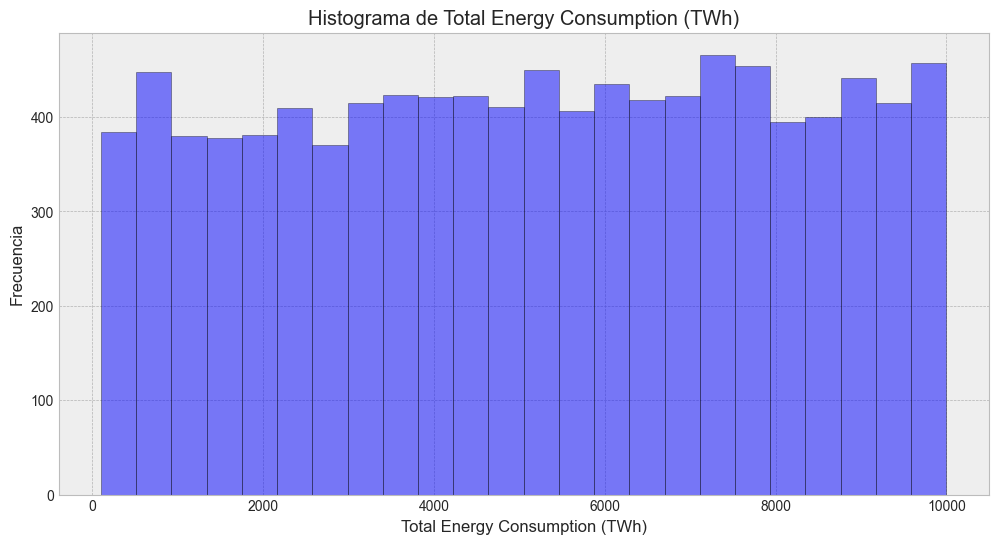

In [16]:
# Histograma de Total Energy Consumption (TWh)
viz.crear_histograma(df, 'Total Energy Consumption (TWh)', 'Total Energy Consumption (TWh)', 'Frecuencia')

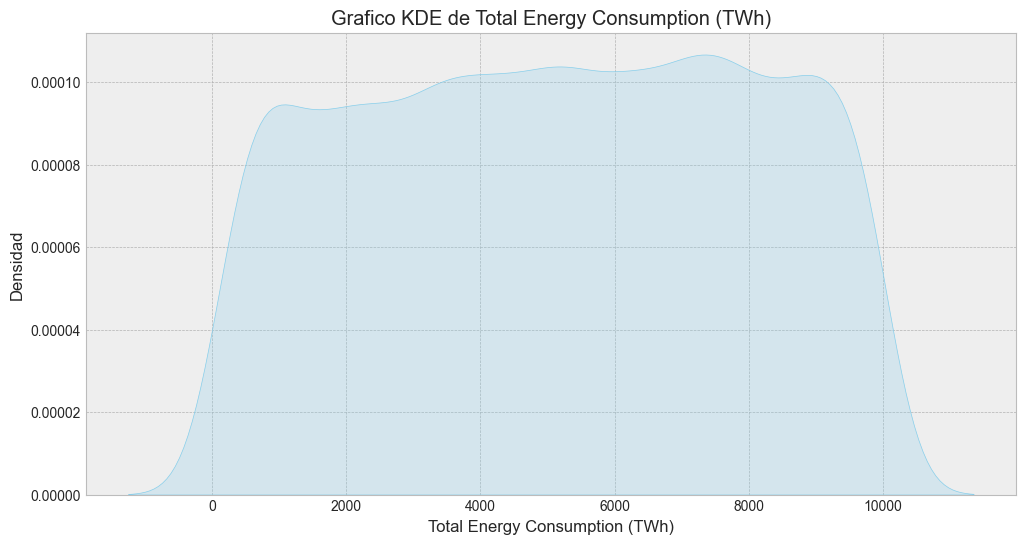

In [17]:
# Gráfico de estimación de densidad de kernel de Total Energy Consumption (TWh)
viz.crear_grafico_kde(df, 'Total Energy Consumption (TWh)', 'Total Energy Consumption (TWh)', 'Densidad')

#### 3.2.  Histograma y KDE plot de `Per Capita Energy Use (kWh)`

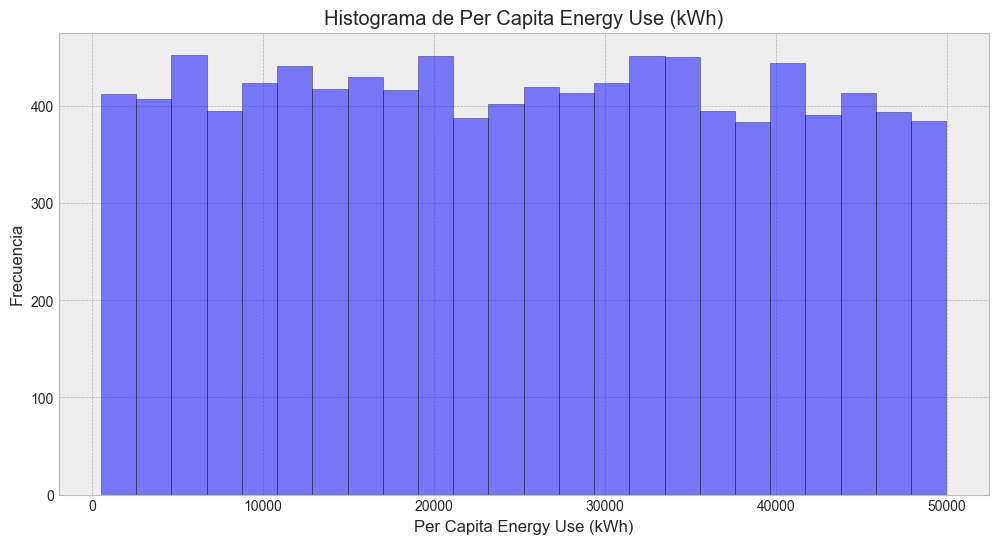

In [18]:
# Histograma de Per Capita Energy Use (kWh)
viz.crear_histograma(df, 'Per Capita Energy Use (kWh)', 'Per Capita Energy Use (kWh)', 'Frecuencia')

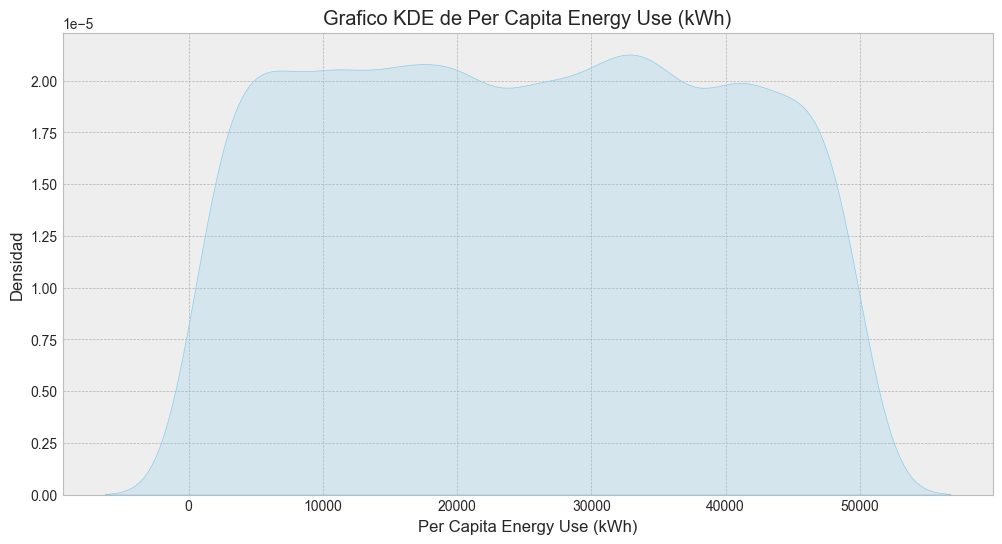

In [19]:
# Gráfico de estimación de densidad de kernel de Per Capita Energy Use (kWh)
viz.crear_grafico_kde(df, 'Per Capita Energy Use (kWh)', 'Per Capita Energy Use (kWh)', 'Densidad')

#### 3.3 Histograma y KDE plot de `Renewable Energy Share (%)`

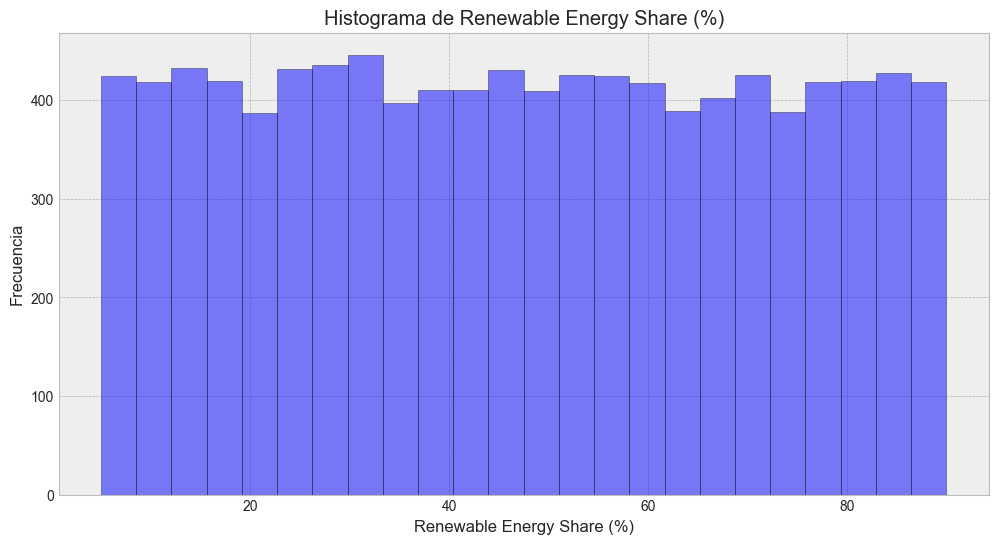

In [20]:
# Histograma de Renewable Energy Share (%)
viz.crear_histograma(df, 'Renewable Energy Share (%)', 'Renewable Energy Share (%)', 'Frecuencia')

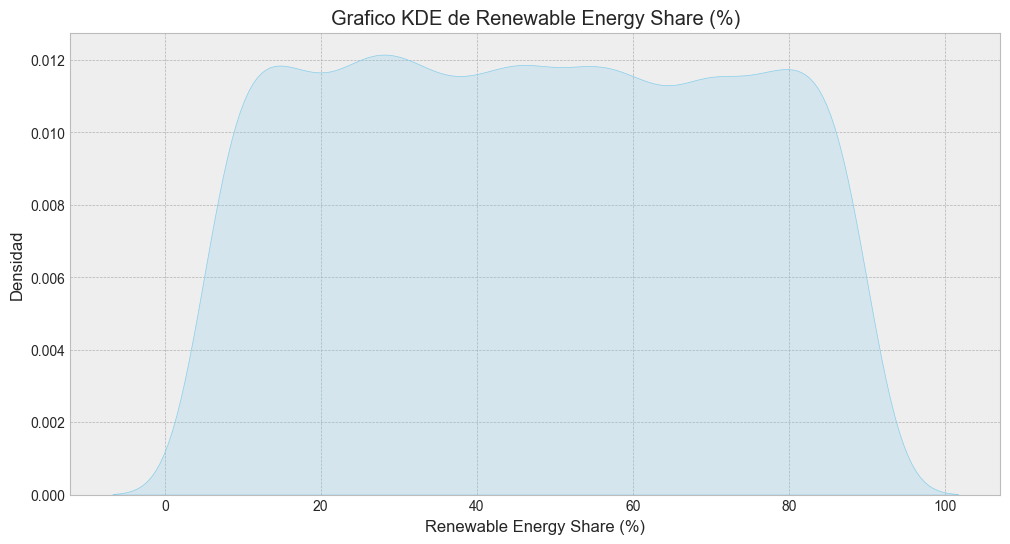

In [21]:
# Gráfico de estimación de densidad de kernel de Renewable Energy Share (%)
viz.crear_grafico_kde(df, 'Renewable Energy Share (%)', 'Renewable Energy Share (%)', 'Densidad')

#### 3.4. Histograma y KDE plot de `Fossil Fuel Dependency (%)`

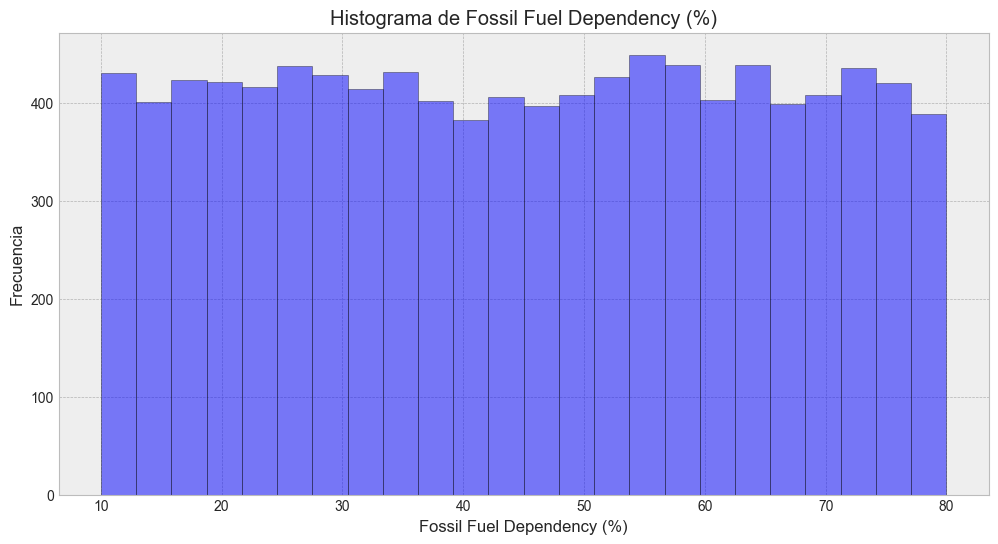

In [22]:
# Histograma de Fossil Fuel Dependency (%)
viz.crear_histograma(df, 'Fossil Fuel Dependency (%)', 'Fossil Fuel Dependency (%)', 'Frecuencia')

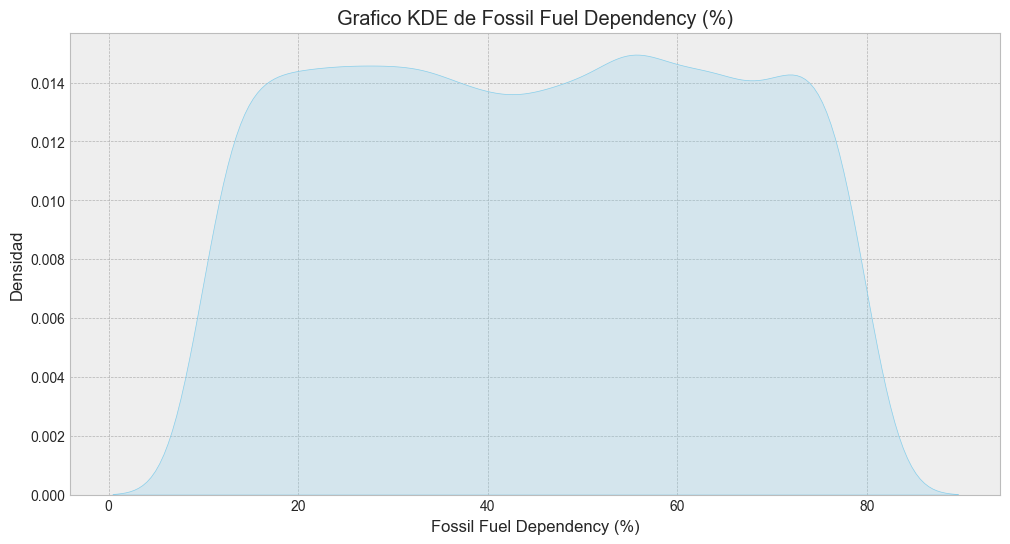

In [23]:
# Gráfico de estimación de densidad de kernel de Fossil Fuel Dependency (%)
viz.crear_grafico_kde(df, 'Fossil Fuel Dependency (%)', 'Fossil Fuel Dependency (%)', 'Densidad')

#### 3.5. Histograma y KDE plot de `Carbon Emissions (Million Tons)`

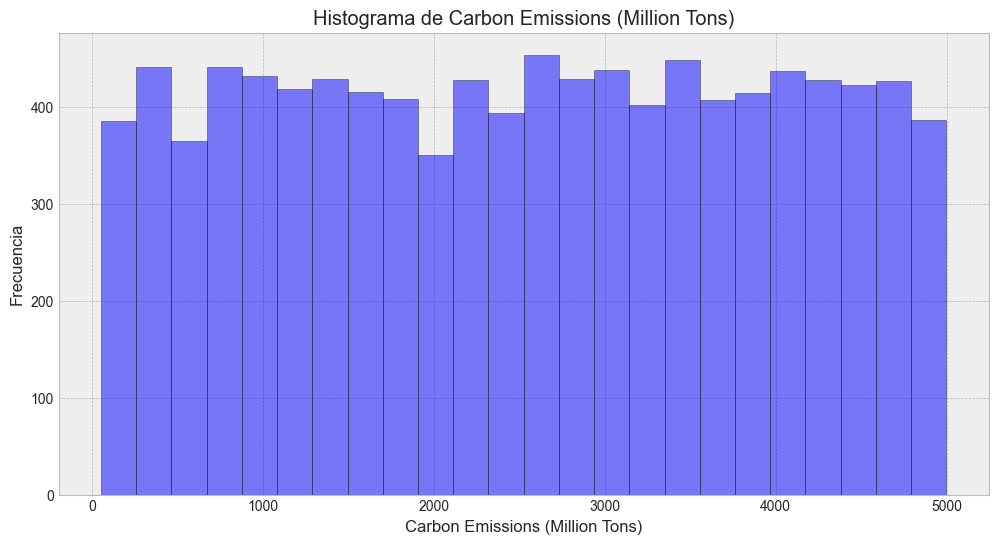

In [24]:
# Histograma de Carbon Emissions (Million Tons)
viz.crear_histograma(df, 'Carbon Emissions (Million Tons)', 'Carbon Emissions (Million Tons)', 'Frecuencia')

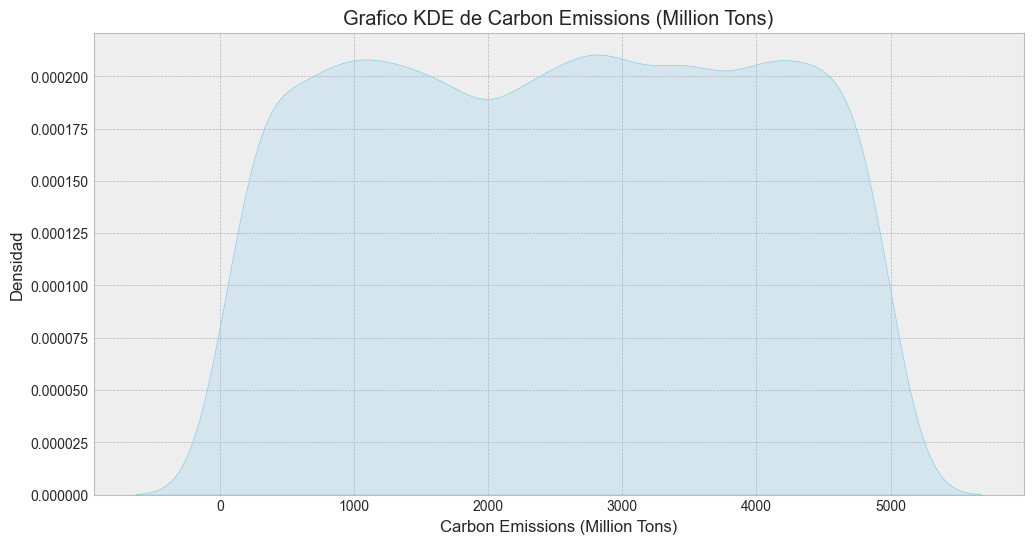

In [25]:
# Gráfico de estimación de densidad de kernel de Fossil Fuel Dependency (%)
viz.crear_grafico_kde(df, 'Carbon Emissions (Million Tons)', 'Carbon Emissions (Million Tons)', 'Densidad')

#### 3.6. Histograma y KDE plot de `Energy Price Index (USD/kWh)`

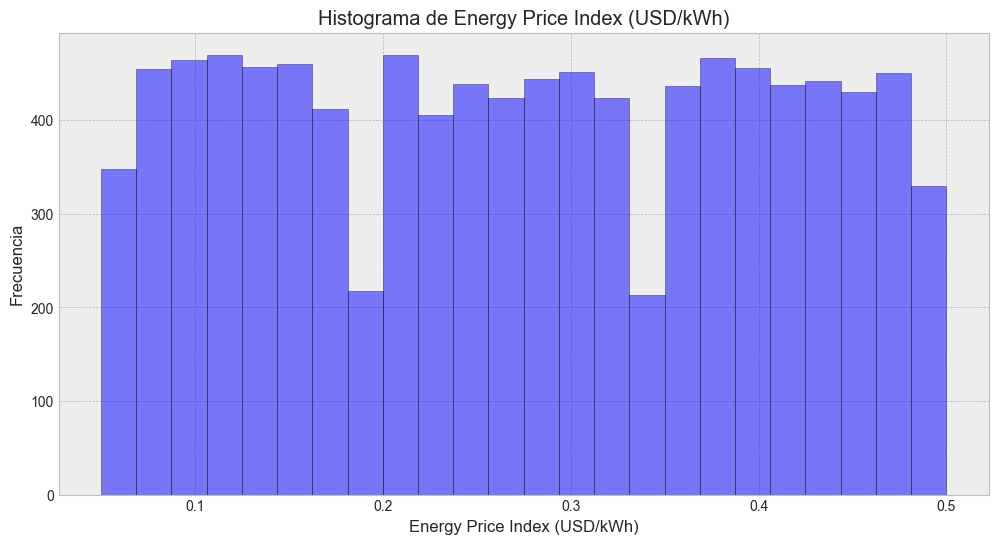

In [26]:
# Histograma de Energy Price Index (USD/kWh)
viz.crear_histograma(df, 'Energy Price Index (USD/kWh)', 'Energy Price Index (USD/kWh)', 'Frecuencia')

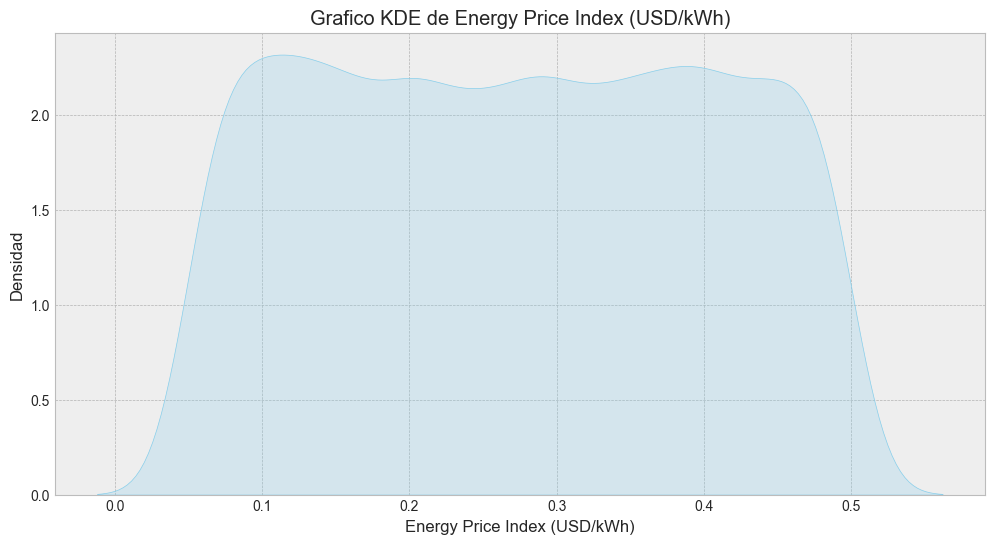

In [27]:
# Gráfico de estimación de densidad de kernel de Energy Price Index (USD/kWh)
viz.crear_grafico_kde(df, 'Energy Price Index (USD/kWh)', 'Energy Price Index (USD/kWh)', 'Densidad')

#### 3.7. Boxplots comparativos por país para todas las variables anteriores

In [28]:
cols = ['Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 
        'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 
        'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']

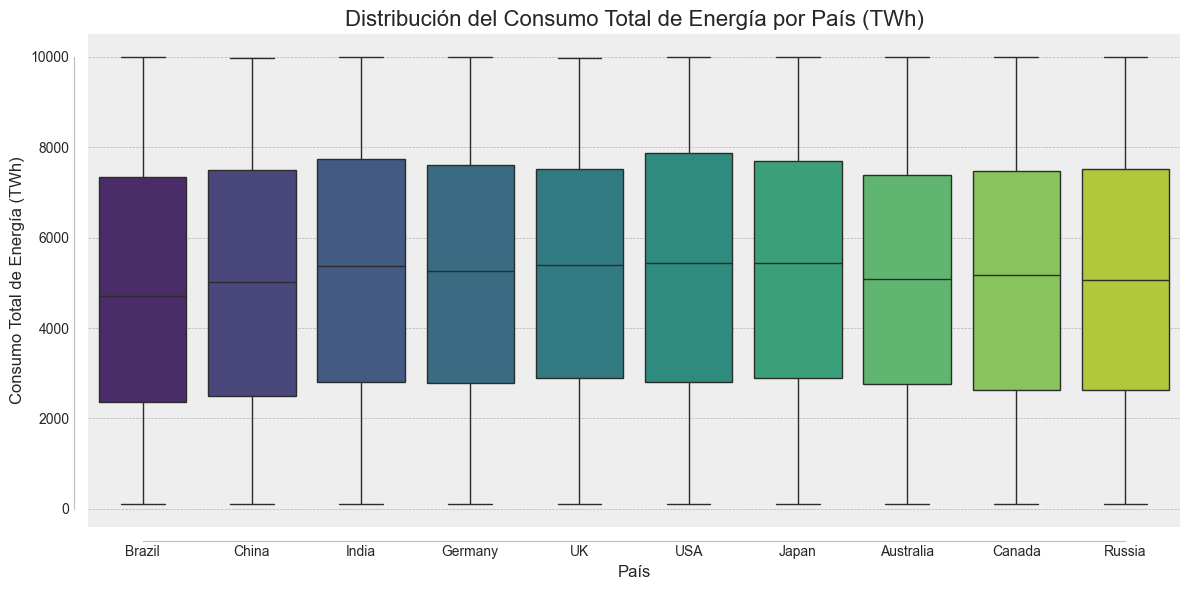

In [29]:
# Generando un Boxplot para el Total Energy Consumtion (TWh)
viz.crear_boxplot(df, 'Country', 'Total Energy Consumption (TWh)', 'Distribución del Consumo Total de Energía por País (TWh)', 'País', 'Consumo Total de Energía (TWh)')

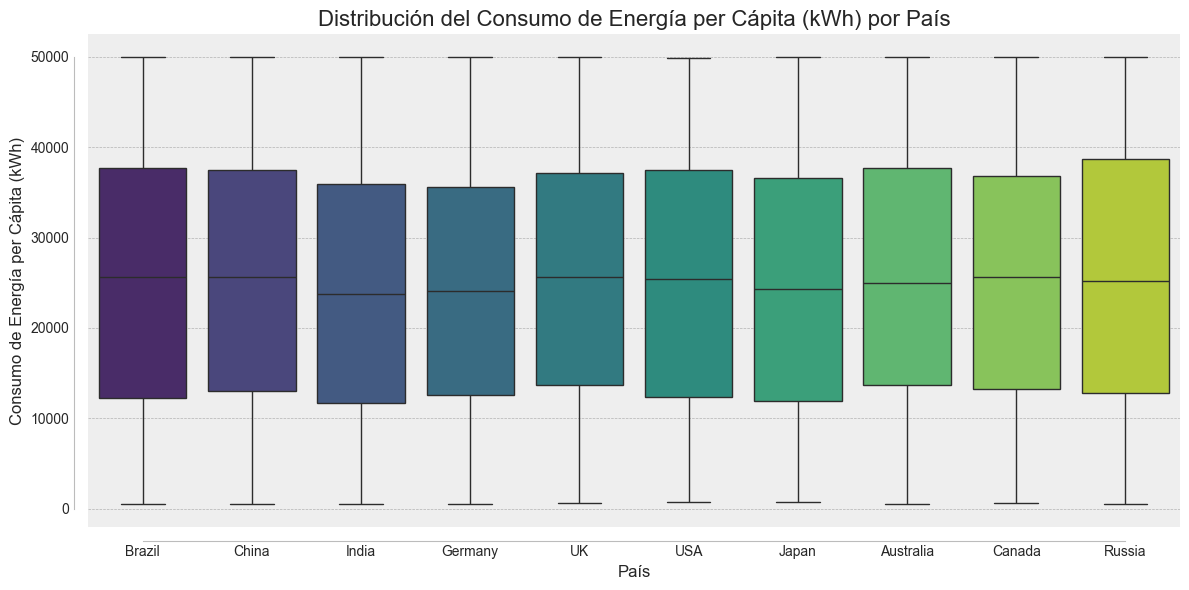

In [30]:
# Generando un Boxplot para el Per Capita Energy Use (kWh)
viz.crear_boxplot(df, 'Country', 'Per Capita Energy Use (kWh)', 'Distribución del Consumo de Energía per Cápita (kWh) por País', 'País', 'Consumo de Energía per Cápita (kWh)')

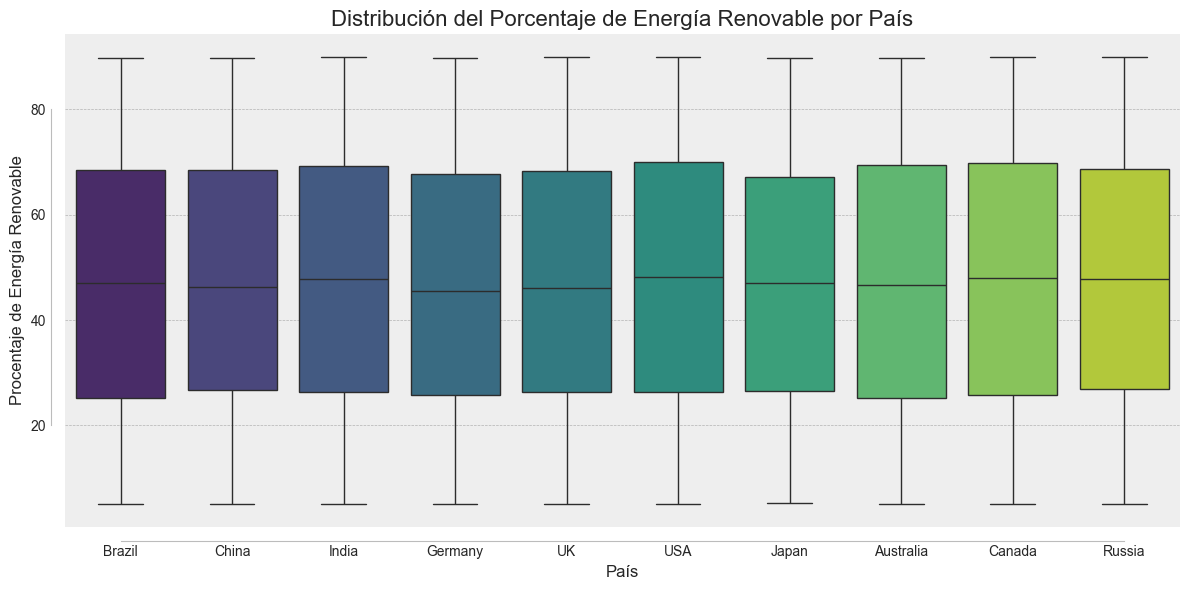

In [31]:
# Generando un Boxplot para el Renewable Energy Share (%)
viz.crear_boxplot(df, 'Country', 'Renewable Energy Share (%)', 'Distribución del Porcentaje de Energía Renovable por País', 'País', 'Procentaje de Energía Renovable')

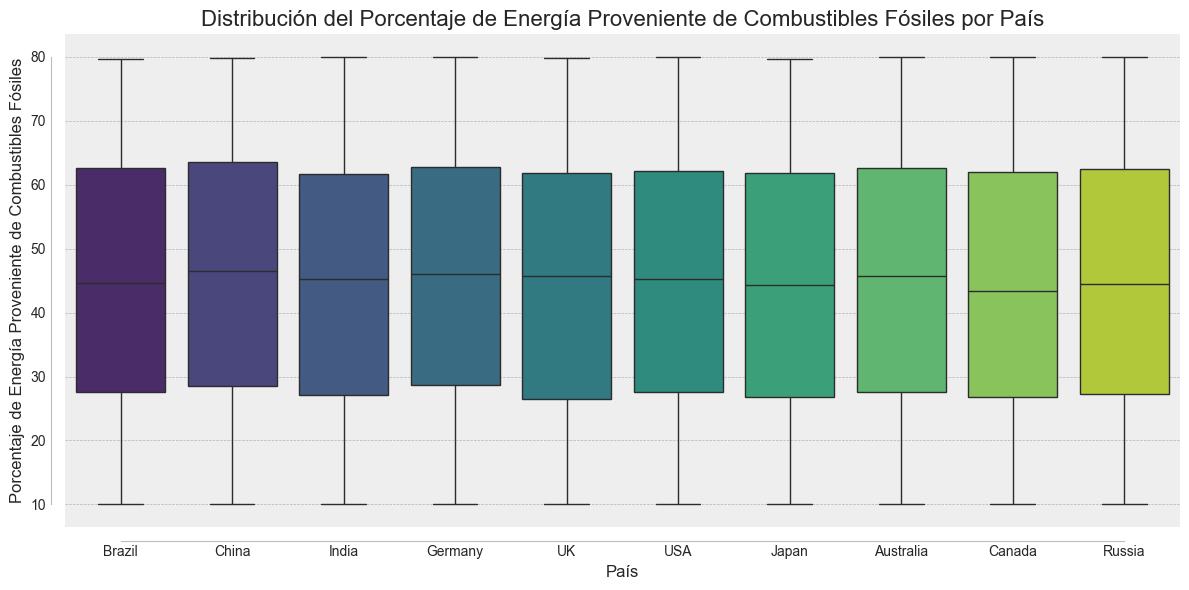

In [32]:
# Generando un Boxplot para el Fossil Fuel Dependency (%)
viz.crear_boxplot(df, 'Country', 'Fossil Fuel Dependency (%)', 'Distribución del Porcentaje de Energía Proveniente de Combustibles Fósiles por País', 'País', 'Porcentaje de Energía Proveniente de Combustibles Fósiles')

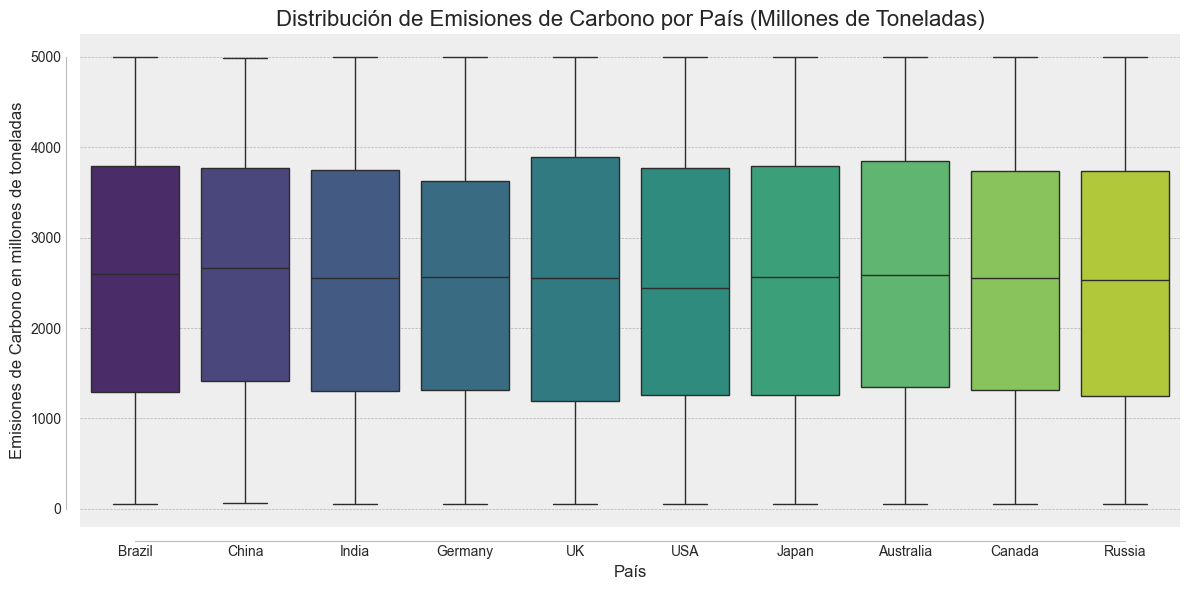

In [33]:
# Generando un Boxplot para el Carbon Emissions (Million Tons)
viz.crear_boxplot(df, 'Country', 'Carbon Emissions (Million Tons)', 'Distribución de Emisiones de Carbono por País (Millones de Toneladas)', 'País', 'Emisiones de Carbono en millones de toneladas')

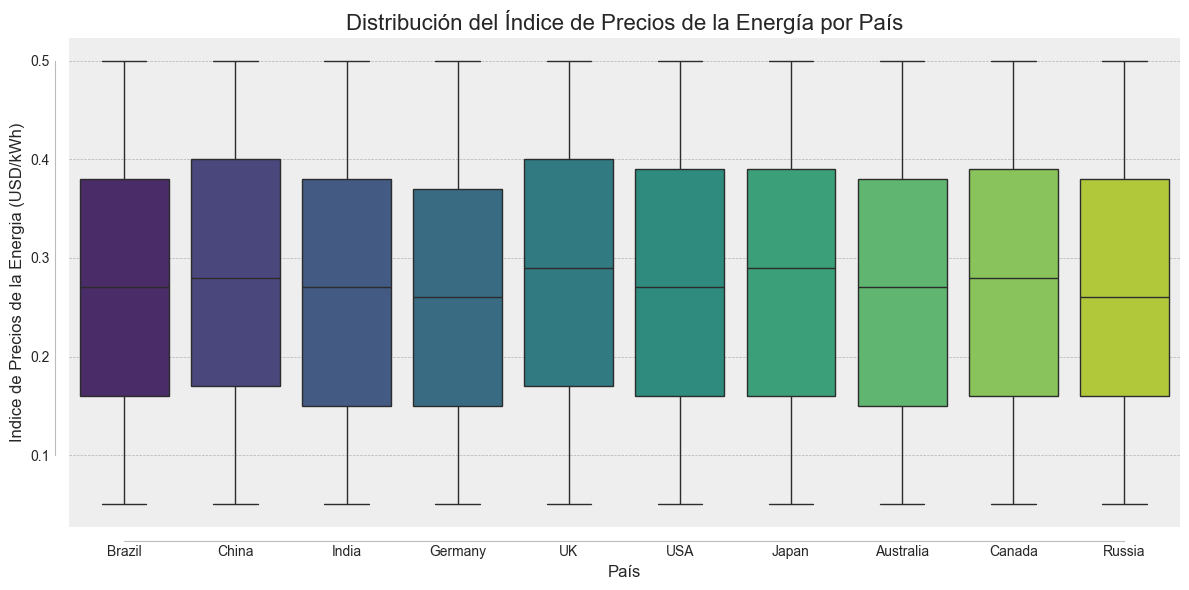

In [34]:
# Generando un Boxplot para el Energy Price Index (USD/kWh)
viz.crear_boxplot(data = df, nombre_col1 = 'Country', nombre_col2 = 'Energy Price Index (USD/kWh)', titulo = 'Distribución del Índice de Precios de la Energía por País', etiqueta_eje_x = 'País', etiqueta_eje_y = 'Indice de Precios de la Energia (USD/kWh)')

#### 3.8. Casos Destacados: Países en los Extremos del Espectro Energético

In [35]:
categorias = [
    'Total Energy Consumption (TWh)',
    'Per Capita Energy Use (kWh)',
    'Renewable Energy Share (%)',
    'Fossil Fuel Dependency (%)',
    'Carbon Emissions (Million Tons)',
    'Energy Price Index (USD/kWh)'
]

pro.mediana_categoria(df, categorias)

Categoría: Total Energy Consumption (TWh)
  Mediana más grande: País = USA, Valor = 5436.99
  Mediana más pequeña: País = Brazil, Valor = 4717.81
-------------------------------------------------------
Categoría: Per Capita Energy Use (kWh)
  Mediana más grande: País = Brazil, Valor = 25679.71
  Mediana más pequeña: País = India, Valor = 23798.62
-------------------------------------------------------
Categoría: Renewable Energy Share (%)
  Mediana más grande: País = USA, Valor = 48.14
  Mediana más pequeña: País = Germany, Valor = 45.44
-------------------------------------------------------
Categoría: Fossil Fuel Dependency (%)
  Mediana más grande: País = China, Valor = 46.43
  Mediana más pequeña: País = Canada, Valor = 43.35
-------------------------------------------------------
Categoría: Carbon Emissions (Million Tons)
  Mediana más grande: País = China, Valor = 2658.90
  Mediana más pequeña: País = USA, Valor = 2445.41
-------------------------------------------------------
Ca

In [36]:
categorias = [
    'Total Energy Consumption (TWh)',
    'Per Capita Energy Use (kWh)',
    'Renewable Energy Share (%)'
]
pro.top_mediana_categoria(df, categorias)

Categoría: Total Energy Consumption (TWh)
  Top 3 Mediana más grande:
    País = USA, Valor = 5436.99
    País = Japan, Valor = 5430.17
    País = UK, Valor = 5396.18
  Top 3 Mediana más pequeña:
    País = Brazil, Valor = 4717.81
    País = China, Valor = 5019.09
    País = Russia, Valor = 5059.20
-------------------------------------------------------
Categoría: Per Capita Energy Use (kWh)
  Top 3 Mediana más grande:
    País = Brazil, Valor = 25679.71
    País = China, Valor = 25647.35
    País = Canada, Valor = 25628.65
  Top 3 Mediana más pequeña:
    País = India, Valor = 23798.62
    País = Germany, Valor = 24126.11
    País = Japan, Valor = 24289.06
-------------------------------------------------------
Categoría: Renewable Energy Share (%)
  Top 3 Mediana más grande:
    País = USA, Valor = 48.14
    País = Canada, Valor = 48.02
    País = India, Valor = 47.78
  Top 3 Mediana más pequeña:
    País = Germany, Valor = 45.44
    País = UK, Valor = 46.03
    País = China, Valor =

In [37]:
categorias = [
    'Fossil Fuel Dependency (%)',
    'Carbon Emissions (Million Tons)',
    'Energy Price Index (USD/kWh)'
]
pro.top_mediana_categoria(df, categorias)

Categoría: Fossil Fuel Dependency (%)
  Top 3 Mediana más grande:
    País = China, Valor = 46.43
    País = Germany, Valor = 46.00
    País = UK, Valor = 45.76
  Top 3 Mediana más pequeña:
    País = Canada, Valor = 43.35
    País = Japan, Valor = 44.38
    País = Russia, Valor = 44.46
-------------------------------------------------------
Categoría: Carbon Emissions (Million Tons)
  Top 3 Mediana más grande:
    País = China, Valor = 2658.90
    País = Brazil, Valor = 2593.24
    País = Australia, Valor = 2584.01
  Top 3 Mediana más pequeña:
    País = USA, Valor = 2445.41
    País = Russia, Valor = 2535.50
    País = UK, Valor = 2554.90
-------------------------------------------------------
Categoría: Energy Price Index (USD/kWh)
  Top 3 Mediana más grande:
    País = Japan, Valor = 0.29
    País = UK, Valor = 0.29
    País = Canada, Valor = 0.28
  Top 3 Mediana más pequeña:
    País = Germany, Valor = 0.26
    País = Russia, Valor = 0.26
    País = Australia, Valor = 0.27
-------

## **Evaluación de la Hipótesis planteada para la sección**

---

#### R/ La hipótesis se sostiene parcialmente al analizar el consumo total de energía, donde economías más grandes y desarrolladas tienden a presentar medianas más altas. No obstante, el análisis del consumo per cápita revela que el nivel de industrialización, urbanización e infraestructura, por sí solos, no determinan directamente un mayor consumo individual. Otros factores específicos de cada nación juegan un papel crucial en la configuración del uso de energía por habitante, como lo pueden ser sus habitos, como lo pueden ser sus hábitos de consumo arraigados culturalmente, las políticas gubernamentales de eficiencia energética o subsidios y transporte, e incluso las condiciones climáticas que demandan un mayor o menor uso de energía para climatización.



## **Respuestas a las preguntas de la sección**

#### *¿Cuál es la distribución general de cada variable?*

---

#### R/ Es evidente que los histogramas y los gráficos KDE revelan consistentemente distribuciones multimodales, caracterizadas por la presencia de múltiples picos o valores de alta frecuencia. Esta característica, técnicamente denominada distribución multimodal, sugiere la existencia de distintos grupos de países que comparten niveles de **Consumo de Energía per Cápita (kWh)**, **Consumo Total de Energía (TWh)**, etc. que son notablemente similares para las naciones analizadas.

#### *¿Qué país tiene la mediana más alta/baja de cada variable?*

---

#### R\ Para determinar cual es el país con mediana más alta o baja usaremos la información proporcionada por los boxplot o graficos de cajas y bigotes.

#### - Para la variable "Consumo Total de Energía (TWh)", tenemos que USA tiene la mediana más alta entre los países a analizar siendo esta de **5437 TWh** lo que se puede interpretar como mejores condiciones economicas, una infraestructura mucho más amplia y robusta a comparación de las otras naciones, consumos elevados tanto de industrias, comercios y usuarios residenciales. En contraste esta Brasil con una mediana de **4717.8 TWh**, esta diferencia entre ambos paises tambien se debe al desarrollo económico, social e industrial, dado que el pais número 1 actualmente es USA es la super potencia, mientras que Brasil esta en una etapa de crecimiento, dónde aún no se puede comparar su ecónomia, infraestructura e incluso su demanda con paises del nivel de USA.
#### A partir de lo antes mencionado surgen cuestiones interesantes como: ¿Cómo se mantendría la sostenibilidad energética de grandes economías? y tambien ¿Qué caminos deberían de seguir las economías emergentes como Brasil?

#### - Para la variable "Consumo de Energía per Cápita (kWh)", se presenta a Brasil con ma mayor mediana de consumo per cápita siendo esta de **25679.7 kWh** comparado con India que presenta un consumo de **23798.6 kWh**, en si esta métrica representa la cantidad promedio de energía que consume una persona para este caso durante 1 año, lo que se puede interpretar como una disparidad en los estándares de vida, el acceso a la eléctricidad y el nivel de industrialización, esto hay que verlo desde las realidades sociale de ambos paises, en India se presenta una alta desigualdad social, pobresa y un sistema de castas, lo que dificulta el acceso a servicios básicos por lo que el consumo disminuye, Brasil tambien enfrenta retos como la desigualdad regional, la violencia y la marginalización de ciertos grupos. 
#### Aunque ambos paises presentan dificultades sociales el acceso a los servicios básicos es muy difente para Brasil que para India y esto se ve reflejado en el consumo de energía per cápita.

#### - Para la variable "Porcentaje de Energía Renovable", Sorprendentemente USA muestra una mayor mediana que Alemania, famosa por su transición energética, estos resultados se podrían deber cómo se clasifican y reportan las energías renovables, USA al tener una mayor diversidad geográfica e incluso mayor tamaño lo que facilita la implementación de distintos tipos de generación renovables (hidroeléctrica, solar, eólica, etc).

#### - Para la variable "Porcentaje de Energía Proveniente de Combustibles Fósiles", esta métrica ilustra como algunas economías emergentes buscan un rapido desarrollo de sus economías a cualquier costo, sin importar el desastre que provocan, por lo que esta métrica debería tomarse en cuenta para ejercer presiones para reducir las emisiones por país de tal forma que se cumplan ciertos acuerdos internacionales como el **Acuerdo de París del 2015**.
#### Como era de esperarse, China domina esta métrica con un **46.43%** de dependencia de combustibles fósiles, mientras que Canadá presenta un **43.35%**. A primera vista, estos porcentajes son sorprendentemente similares, pero la diferencia radica en la escala absoluta del consumo energético de cada nación. Aunque la proporción de dependencia de combustibles fósiles sea relativamente cercana, el volumen total de energía que consume China es significativamente mayor que el de Canadá. Por lo tanto, incluso una pequeña diferencia porcentual en la dependencia de fuentes fósiles se traduce en una diferencia sustancial en términos de la cantidad total de combustibles fósiles quemados y, consecuentemente, en las emisiones de gases de efecto invernadero.

#### - Para la variable "Emisiones de Carbono en millones de toneladas", se presenta como mayor participante a China conocida como la **"Fabrica del Mundo"** con un uso exorbitante de energías a base de combustibles fósiles (carbon, petrole, gas, etc.) y con un total de **2658.9 millones de toneladas**, por otro lado tenemos a USA que presenta emisiones de carbono alrededor de **2445.41 millones de toneladas**.
#### Aunque Estados Unidos sigue siendo un emisor significativo a nivel global, la clara primacía de China en esta métrica subraya el impacto ambiental de su modelo de crecimiento económico impulsado por la manufactura a gran escala y su histórica dependencia del carbón como principal fuente de energía. La diferencia de más de 200 millones de toneladas anuales entre ambos países representa una cantidad considerable de gases de efecto invernadero liberados a la atmósfera, con implicaciones directas para el cambio climático global.

#### - Para la variable "Indice de Precios de la Energia (USD/kWh)", el país con mayor Indice de precios corresponde a Japon con un valor de **0.29 USD/kWh**, este precio siendo el más alto en la lista de paises refleja los desafios que se presentan al ser un país insular (una isla gigante), que no posee muchos recursos, por lo que depende en gran medida de la importación de energía de paises vecinos, lo que explica sus precios más elevados. Por otro lado tenemos a Alemania con un precio no muy distinto pero un poco más bajo de **0.26 USD/kWh**, esto se le puede atribuir a los incentivos que tienen las energías renovables.
#### De lo antes mencionado se puede concluir que los precios más altos pueden acelerar la adopción de medidas de eficiencia energética y tecnologías renovables con politicas favorables a este tipo de energías, reduciendo así los indices de precios de la energía.

## 4. Análisis de Fuentes de Energía: Implicaciones en las Emisiones de CO2

### **Hipótesis**: Las sanciones energéticas y tratados (como las aplicadas a Rusia en 2014 y 2022 o el tratado de París) impulsan la diversificación de la matriz energética y fomentan el crecimiento acelerado de renovables en países dependientes de dichas importaciones, lo que a su vez se espera que conduzca a una disminución significativa de sus emisiones de CO2 a mediano y largo plazo.

### **Preguntas de la sección**: 
    
- *¿En qué períodos se aceleró o frenó la adopción de renovables en cada país (p.ej. tras crisis económicas, tras acuerdos climáticos)?*


#### 4.1. Evolución de Energías Renovables

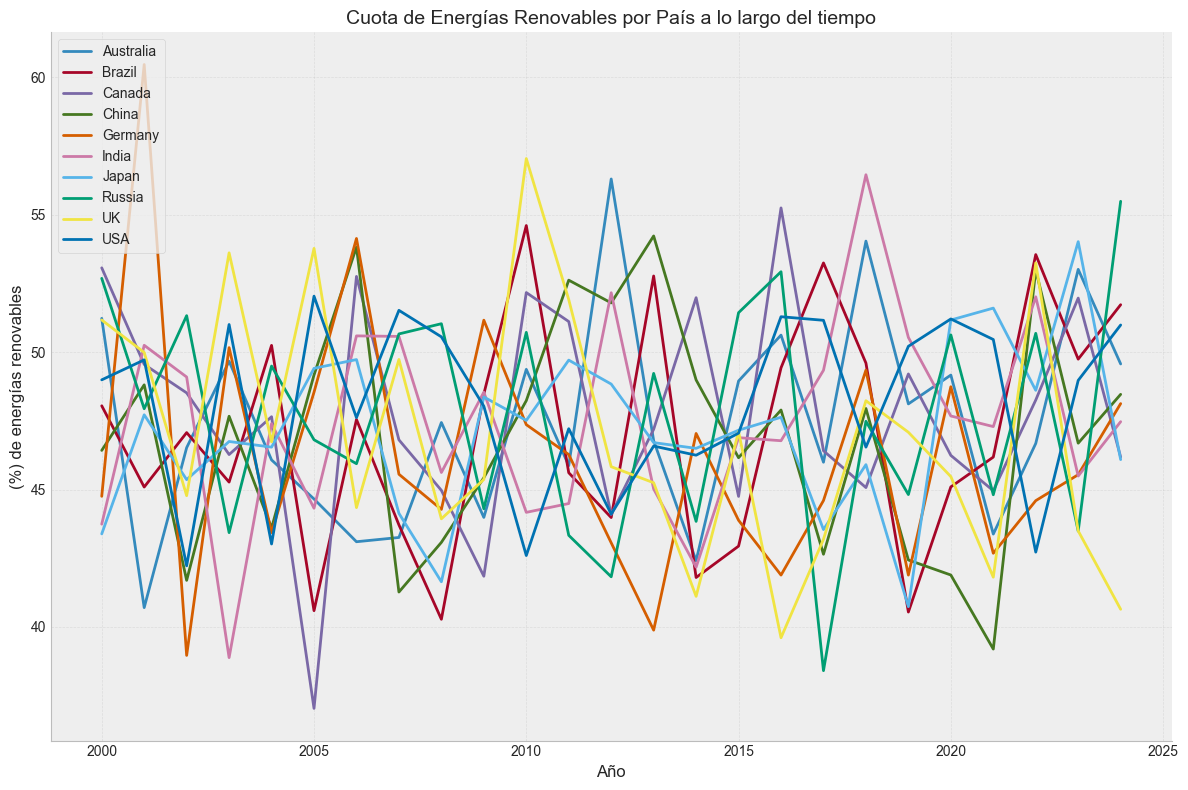

In [38]:
# Creando un grafico de líneas por pais de la metrica Renewable Energy Share (%)

# df_pais = df[(df['Country'] == 'USA') | (df['Country'] == 'Australia')]
viz.crear_graf_lineas(df, 'Country', 'Year', 'Renewable Energy Share (%)', 'Año', '(%) de energías renovables', 'Cuota de Energías Renovables por País a lo largo del tiempo')

# widget_grafico = viz.crear_graf_interactivo(df)
# display(widget_grafico)

#### 4.2. Evolución de la Dependencia de los Combustibles Fósiles

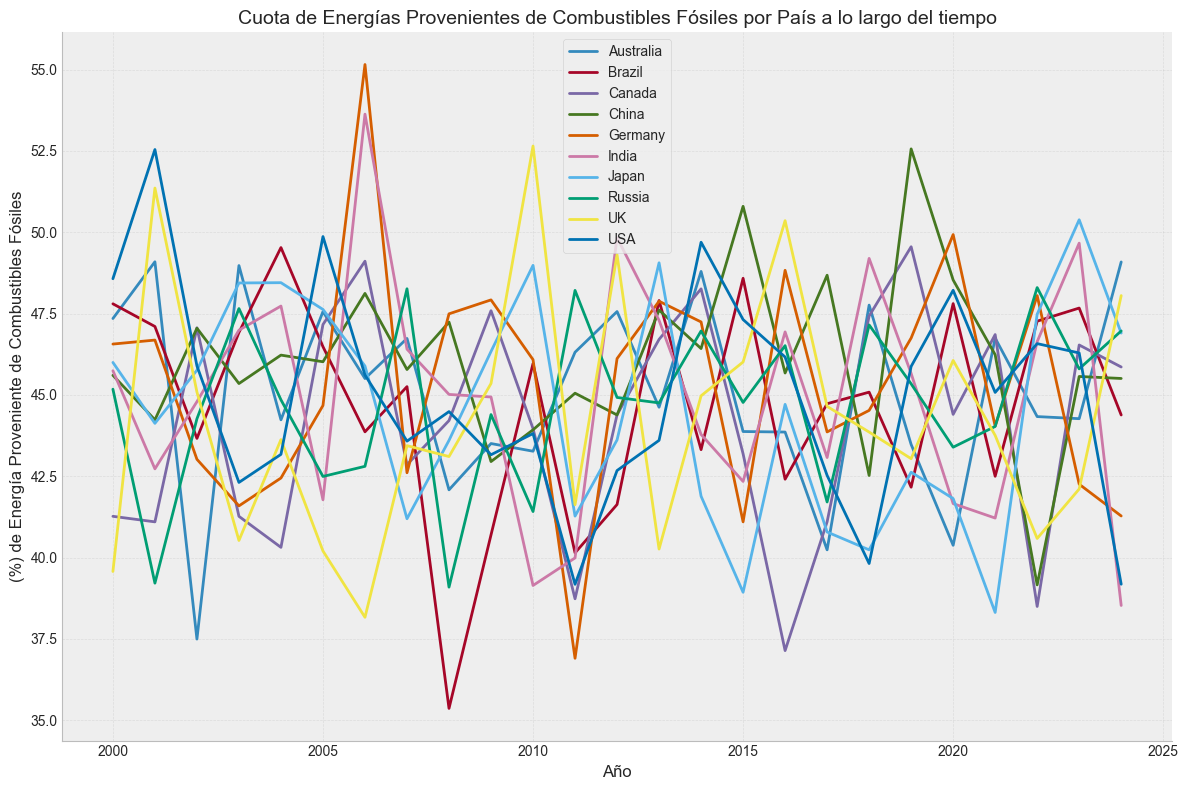

In [39]:
# Creando un grafico de líneas por pais de la metrica Fossil Fuel Dependency (%)
# df_pais = df[df['Country'] == 'Russia']
viz.crear_graf_lineas(df, 'Country', 'Year', 'Fossil Fuel Dependency (%)', 'Año', '(%) de Energía Proveniente de Combustibles Fósiles', 'Cuota de Energías Provenientes de Combustibles Fósiles por País a lo largo del tiempo')


# widget_grafico = viz.crear_graf_interactivo(df)
# display(widget_grafico)

#### 4.3. Evolución del Consumo de Energía Per Capita

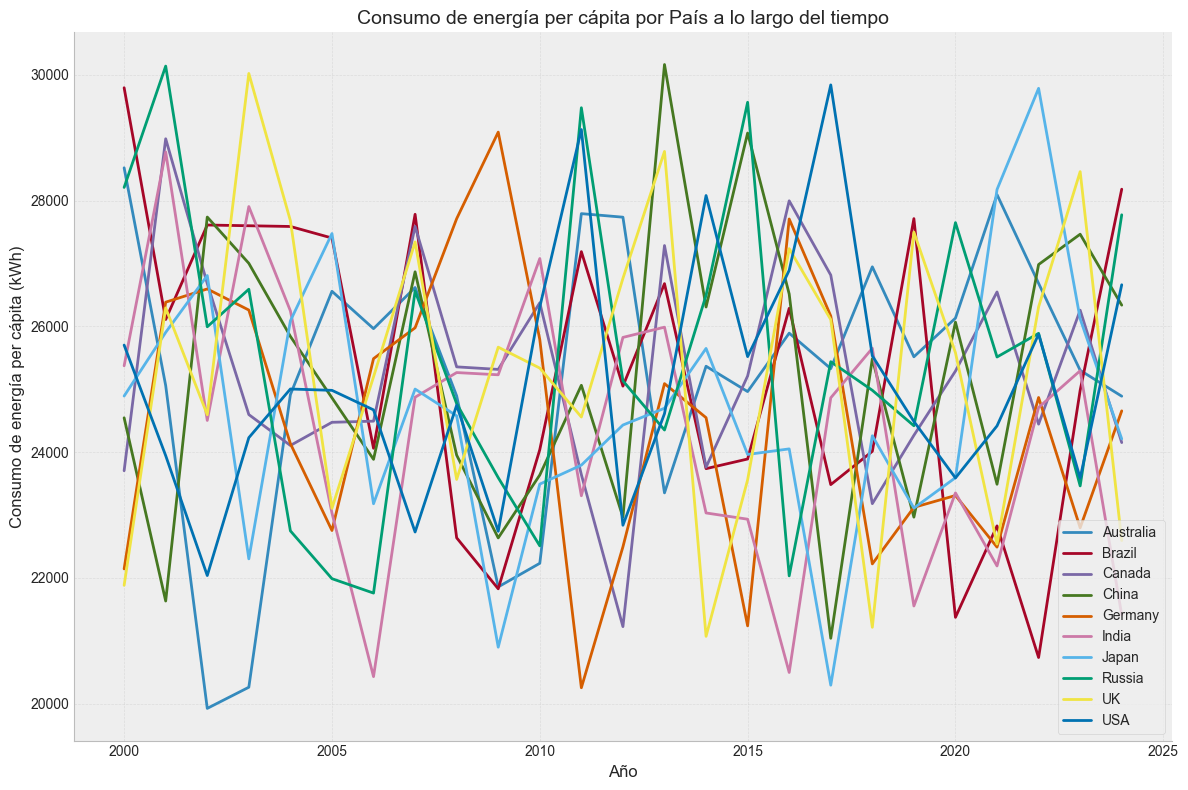

In [40]:
# Creando un gráfico de líneas por país de la métrica Per Capita Energy Use (kWh)
viz.crear_graf_lineas(df, 'Country', 'Year', 'Per Capita Energy Use (kWh)', 'Año', 'Consumo de energía per cápita (kWh)', 'Consumo de energía per cápita por País a lo largo del tiempo')

#### 4.4. Evolución del Consumo de Energía Total

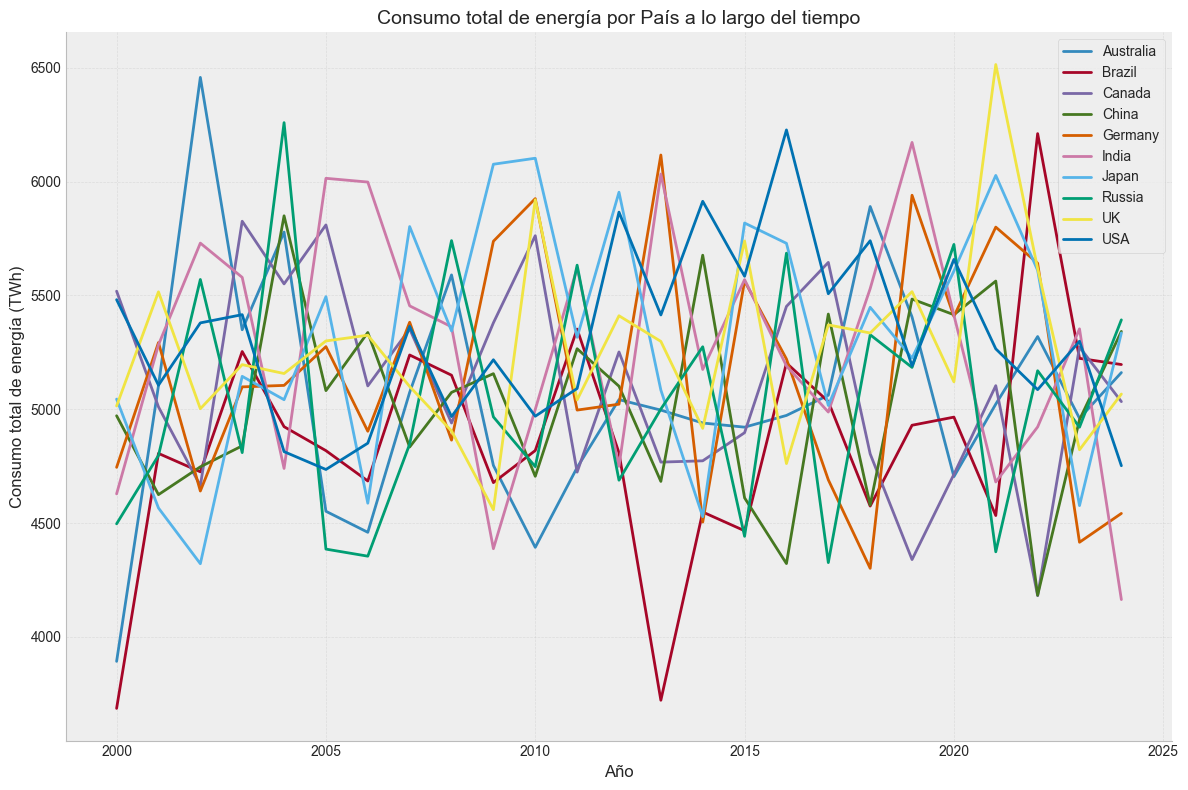

In [41]:
# Creando un gráfico de líneas por país de la métrica Total Energy Consumption (TWh)
viz.crear_graf_lineas(df, 'Country', 'Year', 'Total Energy Consumption (TWh)', 'Año', 'Consumo total de energía (TWh)', 'Consumo total de energía por País a lo largo del tiempo')

#### 4.5. Comparativa entre los Tipos de Energías por País

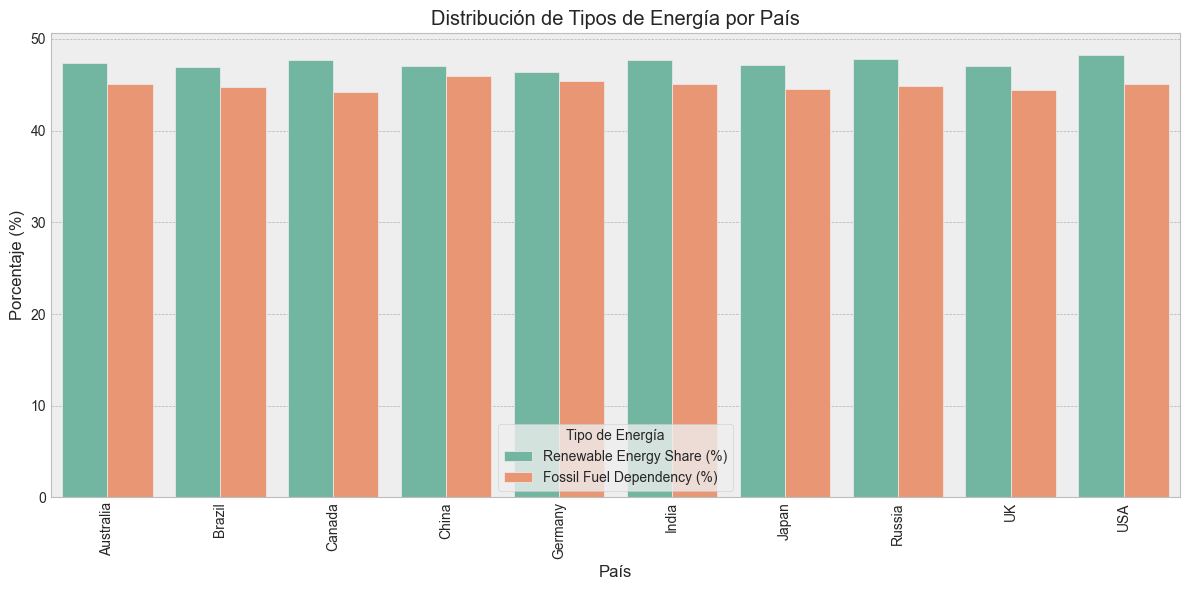

In [42]:
# Creando un gráfico de barras de los tipos de energía por país

viz.crear_grafico_barras_agrupadas(df, 'Country', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Tipo de Energía', 'Porcentajex', 'País', 'Porcentaje (%)', 'Distribución de Tipos de Energía por País')

### Hallazgos Clave:

#### El diagrama de barras revela una similitud inesperada en el mix energético de los países estudiados, con una predominancia cercana al 50% de energías renovables, ligeramente superior a la contribución de los combustibles fósiles en la mayoría de los casos. No obstante, Canadá y Estados Unidos destacan por su mayor cuota de renovables. En contraste, China y Alemania presentan la menor diferencia entre el uso de renovables y fósiles, señalando que la adopción de tecnologías renovables aún no alcanza una penetración sustancial en su matriz energética.

#### Segun lo antes mencionado se puede inferir que, actualmente, la infraestructura y la tecnología de las energías renovables aún no son suficientes para alimentar completamente las demandas energéticas de la mayoría de los países de manera constante y confiable.

#### 4.6. Distribución del Consumo de Energía respecto de las Emisiones de Carbon por País

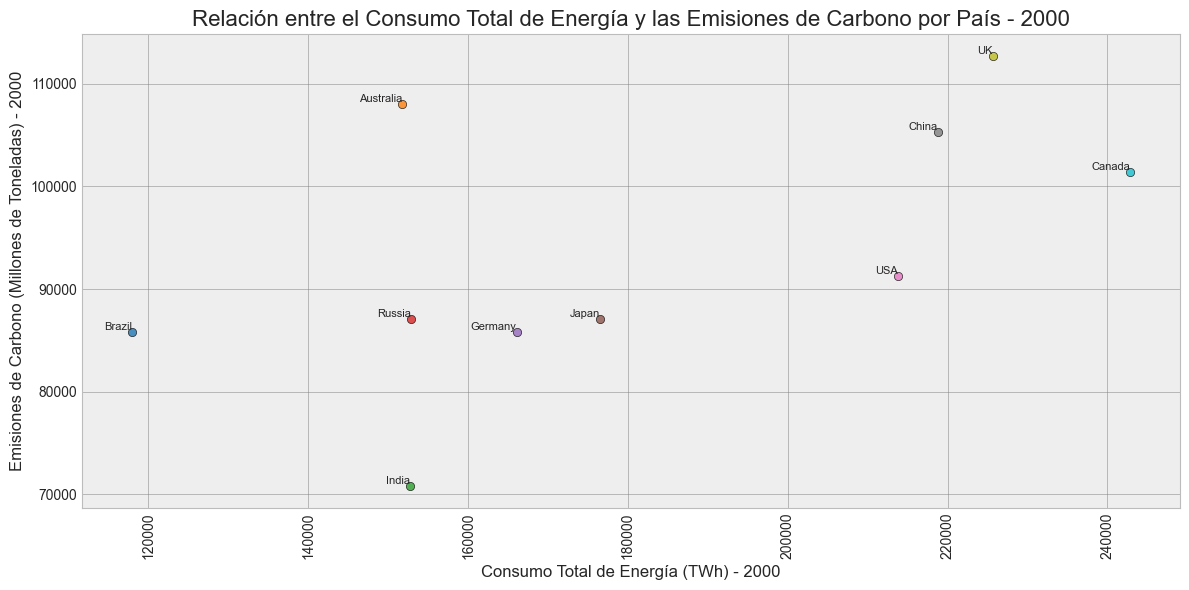

In [43]:
# Creando un gráfico de dispersión entre el consumo total de energía y las emisiones de carbono para el año 2000
viz.crear_grafico_dispersion_por_año(df, 'Country', 'Year', '2000', 'Total Energy Consumption (TWh)', 'Carbon Emissions (Million Tons)', 'Consumo Total de Energía (TWh)', 'Emisiones de Carbono (Millones de Toneladas)', 'Relación entre el Consumo Total de Energía y las Emisiones de Carbono por País')


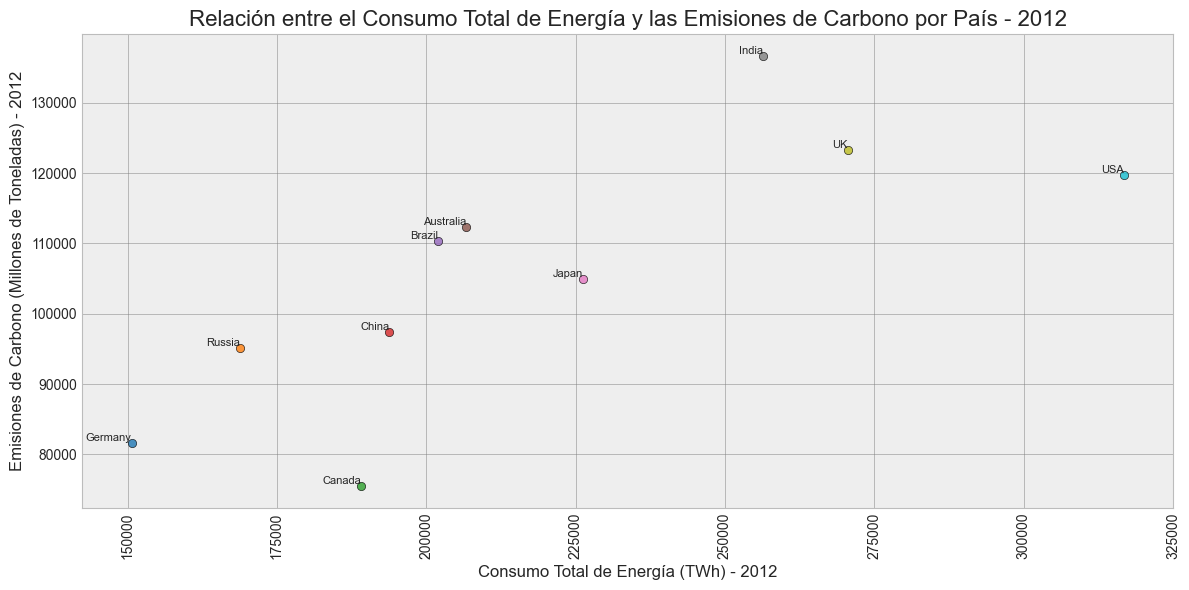

In [44]:
# Creando un gráfico de dispersión entre el consumo total de energía y las emisiones de carbono para el año 2012
viz.crear_grafico_dispersion_por_año(df, 'Country', 'Year', '2012', 'Total Energy Consumption (TWh)', 'Carbon Emissions (Million Tons)', 'Consumo Total de Energía (TWh)', 'Emisiones de Carbono (Millones de Toneladas)', 'Relación entre el Consumo Total de Energía y las Emisiones de Carbono por País')

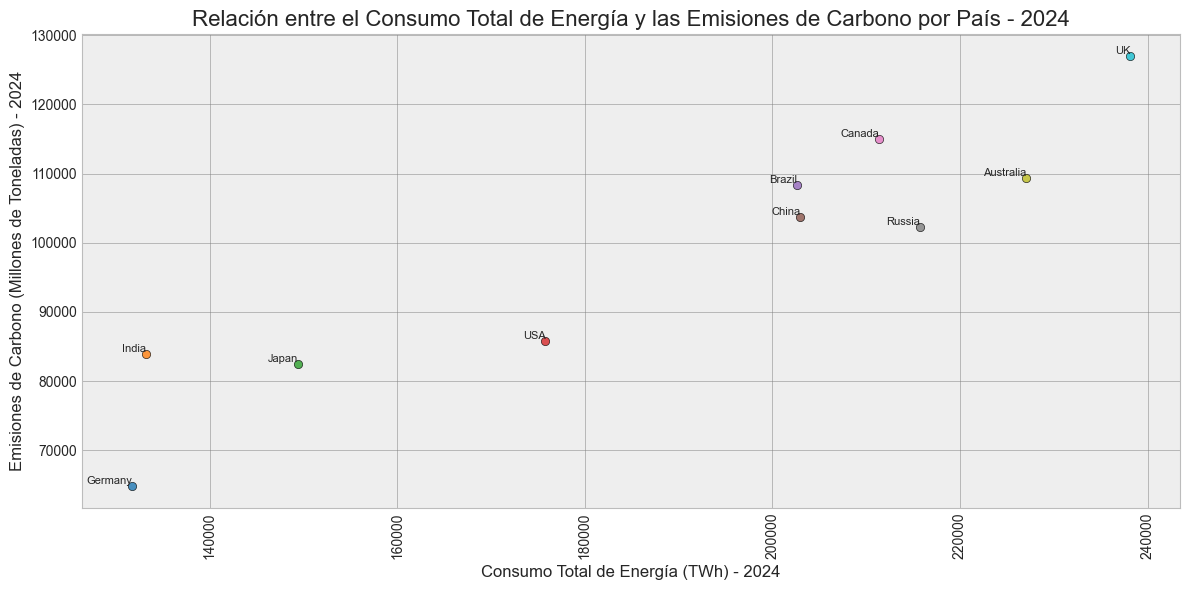

In [45]:
# Creando un gráfico de dispersión entre el consumo total de energía y las emisiones de carbono para el año 2024
viz.crear_grafico_dispersion_por_año(df, 'Country', 'Year', '2024', 'Total Energy Consumption (TWh)', 'Carbon Emissions (Million Tons)', 'Consumo Total de Energía (TWh)', 'Emisiones de Carbono (Millones de Toneladas)', 'Relación entre el Consumo Total de Energía y las Emisiones de Carbono por País')

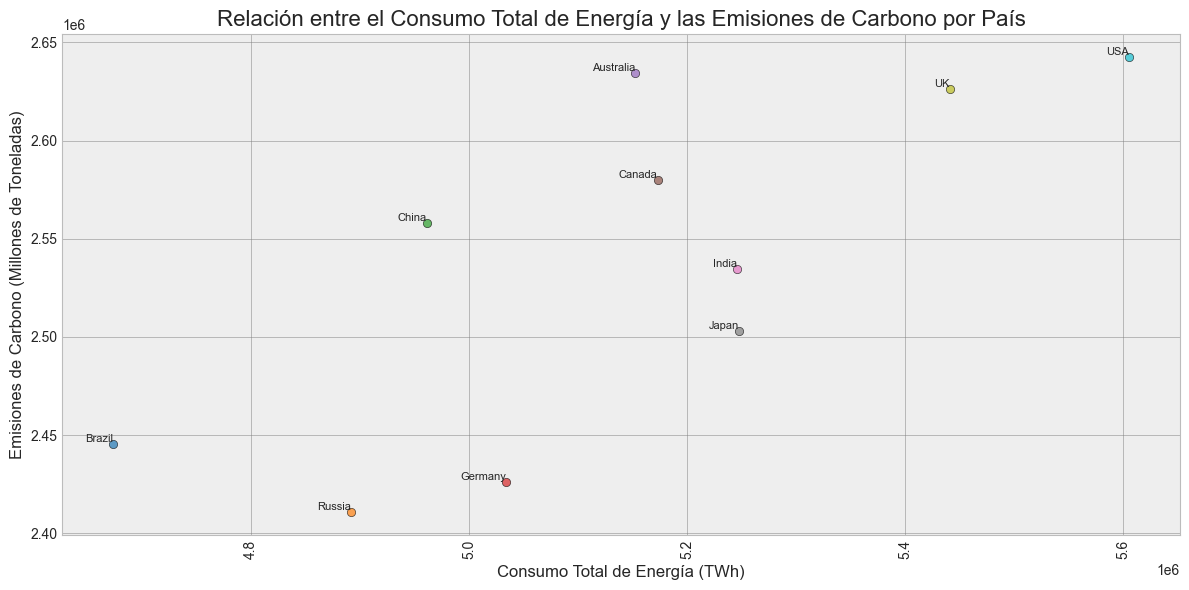

In [46]:
# Creando un gráfico de dispersión entre el consumo total de energía y las emisiones de carbono desde 2000 hasta 2024
viz.crear_grafico_dispersion(df, 'Country', 'Total Energy Consumption (TWh)', 'Carbon Emissions (Million Tons)', 'Consumo Total de Energía (TWh)', 'Emisiones de Carbono (Millones de Toneladas)', 'Relación entre el Consumo Total de Energía y las Emisiones de Carbono por País')

#### 4.7. Correlación entre Fuentes y Consumo

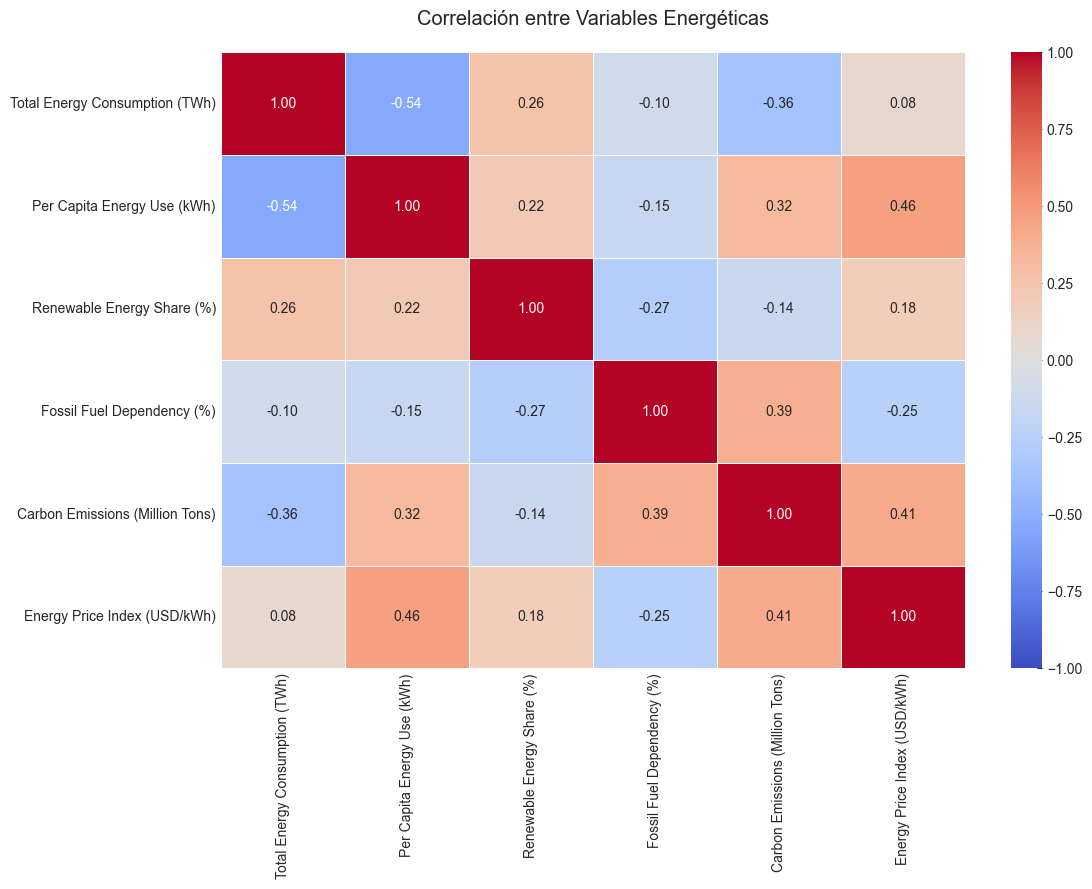

In [47]:
# Cerando un grafico de correlación entre las fuentes tanto renovables como de combustibles fosiles
cols = ['Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']

viz.crear_grafico_correlacion(df, cols, 'Country', 'Correlación entre Variables Energéticas')

## **Evaluación de la Hipótesis planteada para la sección**

---

#### R/ La hipótesis se sostiene en la mayoría de casos, con tratados como el CETA, T-MEC, RCEP, etc. se evidencia un aumento en el uso de tecnologías de energías verdes, por otro lado, están los tratados O acuerdos como el AUSFTA, Acuerdo Mercosur-UE, etc. no beneficiaron el uso de energías renovables y por ende la diversificación de la matriz energética de estos países tendía al uso del petróleo y sus derivados. 

## **Respuestas a las preguntas de la sección**

#### *¿En qué períodos se aceleró o frenó la adopción de renovables en cada país (p.ej. tras crisis económicas, tras acuerdos climáticos)?*

---

#### R/ 

- Australia:

    - Freno 2004-2006 : El AUSFTA con EE.UU. priorizó exportaciones mineras y agrícolas, desincentivando las renovables (tal como se evidencia en la gráfica con bajones en la cuota de energías renovables).

    - Recuperación post-2010 : Políticas verdes y subsidios reactivaron su uso, aunque con fluctuaciones.

    - 2010-2016 : Desaceleración económica post-boom de materias primas frenó inversiones en renovables, pero el ChAFTA - Acuerdo de libre comercio entre China y Australia (2015) diversificó exportaciones y reactivó proyectos verdes.

    - 2018-2023 : Integración al CPTPP - Acuerdo Integral y Progresivo de Asociación Transpacífico y la crisis energética global (2022) aceleraron la transición hacia renovables, aunque con fluctuaciones por inflación y ajustes post-pandemia.

- Brasil:

    - 2008-2009 : La crisis global afectó de forma moderada el uso de energías renovables, haciendo que se refugie en su fuerte con las hidroeléctricas.

    - 2014-2016: Se presenta una recesión económica frenando inversiones en renovables, aunque su matriz hidroeléctrica amortiguó el impacto, por lo que en la gráfica se evidencia un aumento en energías renovables.

    - 2019-2020: Acuerdo Mercosur-UE (no ratificado) y desaceleración pre-pandemia (2019) limitaron avances, pero la solar/eólica crecieron post-2020.

- Canadá:

    - 2017 : CETA - Acuerdo Económico y Comercial Global entre la Unión Europea y Canadá con la UE, esto se derivó en un mayor acceso a tecnologías limpias, aunque esto no se evidencia de forma inmediata en la gráfica, sino que hasta 2018 fue donde aumentó el uso de energías renovables.

    - 2018 : CPTPP - Acuerdo Integral y Progresivo de Asociación Transpacífico, dicho acuerdo favoreció la integración regional verde, dado que se incluyo un capítulo de desarrollo sostenible que obliga a cumplir estándares ambientales elevados, conservar la biodiversidad y reforzar la cooperación contra el cambio climático.

    - 2020-2023 : T-MEC - Tratado entre México, Estados Unidos y Canadá, y pandemia, estos 2 sucesos impactaron en la implementación de energías renovables, aunque tal como se evidencia en la gráfica del 2020-2021 decreció su uso de este tipo de energías, que posteriormente aumentó en gran medida.

- China:

    - Freno post-2001 : Tras su ingreso a la OMC, aumentó su dependencia de combustibles fósiles para exportar productos masivamente, lo que redujo temporalmente su cuota de renovables.

    - Aceleración desde 2010 : Inversión estatal en renovables (solar y eólica) impulsó un crecimiento sostenido, reflejado en el alza gradual de su línea en la gráfica.

    - 2020 : Liderazgo en el RCEP (acuerdo comercial Asia-Pacífico) y compromiso climático (neutralidad de carbono para 2060) impulsan renovables, aunque la pandemia (2020-2022) generó desafíos en cadenas de suministro.

- Almenia:

    - 2008-2009 : La crisis global provocó recortes temporales, pero gracias a la aplicación de la estrategia llamada Energiewende favoreció a que la tendencia dejara de ser negativa a positiva respecto al uso de energías renovables.

    - 2010-2012 : Crisis de la Eurozona, lo que se ve reflejado en la baja del uso de energías renovables de forma estrepitosa.

    - 2022-2023 : Guerra en Ucrania, lo que produjo la crisis energética por el gas Ruso, aunque esto benefició a la aceleración en renovables.

- India:

    - 2008-2009 : Crisis global, aunque esta crisis no afectó la implementación de energías renovables, dado que en la gráfica se ve la tendencia al alza.

    - 2019 : Desaceleración económica pre-pandemia, lo que se traduce en una menor inversión en estas energías, por lo que se ve una tendencia a la baja.

    - 2020 : RCEP - Regional Comprehensive Economic Partnership y objetivos climáticos (500 GW renovables para 2030), esto no tuvo inmediato, sino que justo para el año 2021-2022 aumentaron su uso de energías renovables.

- Japón:

    - 2008-2009 : Crisis global, lo que para este país no representó una caída de las energías renovables; por el contrario, este factor aumentó.

    - 2011 : Fukushima, donde después de este desastre se optó por el abandono nuclear e impulso a renovables.

    - 2018-2019 : CPTPP y EPA con la UE, con estos acuerdos y tratados de cooperación, pero a pesar de esto no se aprecia que mejore el uso de energías renovables.

    - 2020-2023 : Pandemia y alza de precios fósiles, en esta época el comportamiento es algo volátil, por lo que no presenta una tendencia clara.

- Rusia:

    - 2012 : Ingreso a la OMC, en este periodo de tiempo no se presentan mejoras en el uso de energías renovables e incluso se evidencia en la gráfica un aumento en el uso de otro tipo de energías.

    - 2014-2016 : Crisis financiera y sanciones, este evento, en vez de disminuir la cuota de energías renovables, la aumento. Esta tendencia se debe más que todo a la gran oferta de petróleo y gas por parte de la OPEP por lo que sus precios bajaron en gran medida.

    - 2022-2023 : Guerra en Ucrania y sanciones, se presencia un colapso en renovables (dependencia absoluta de hidrocarburos).

- UK:

    - 2008-2009 : Crisis global, aunque este tipo de eventos suelen hacer que un país se refugie en su recurso energético más fuerte que para este tiempo es el petróleo, aun así se presenta una pequeña subida en el uso de energías renovables dando a entender que se está insistiendo en una diversificación de la matriz energética.

    - 2010-2012 : Durante el período de austeridad fiscal post-crisis de la Eurozona, impulsada por la necesidad de consolidar las finanzas públicas, el apoyo a las energías renovables se vio reducido. 

    -  2016 : El referéndum del Brexit marcó la decisión del Reino Unido de separarse de la Unión Europea, un proceso que culminó oficialmente en 2020. Este evento generó una considerable incertidumbre en múltiples campos, incluyendo el energético. La potencial pérdida de financiación europea, la redefinición del marco regulatorio y la perspectiva de una mayor autonomía normativa introdujeron dinámicas contrapuestas. La forma en que el Reino Unido ha usado energías renovables ha cambiado de muchas maneras diferentes. Esto nos dice que el Brexit tuvo efectos buenos y malos a lo largo del tiempo. 

- USA:

    - 2008-2009 : Crisis global, afectando drásticamente a la mayor economía, reflejando en la gráfica un descenso drástico en el uso de energías renovables.

    - 2017 : Retiro del Acuerdo de París, frenando así la inversión a este tipo de energías y aumentando el apoyo del uso del fraking, por lo que en dicho gobierno de turno se priorizó la industria de los combustibles fósiles.

    - 2020 : El T-MEC y la pandemia de COVID-19 representaron eventos de naturaleza opuesta con impactos significativos en el sector energético renovable. A pesar del potencial del acuerdo comercial, la gráfica evidencia que el efecto predominante de la pandemia fue negativo, resultando en una reducción en la proporción de energías renovables utilizadas.

## 5. Distribución del Consumo Energético por Sector y su Vínculo con la Transición Energética

### **Hipótesis**: El aumento en el índice de precios de la energía esta fuertemente relacionado con el consumo de energetico industrial.

### **Preguntas de la sección**: 

- *¿Qué brecha (en puntos porcentuales) existe entre el uso doméstico y el uso industrial de energía en cada país, y cómo varía dicha brecha a lo largo de la muestra de países?*

#### 5.1. Distribución del Consumo Energético por Sector

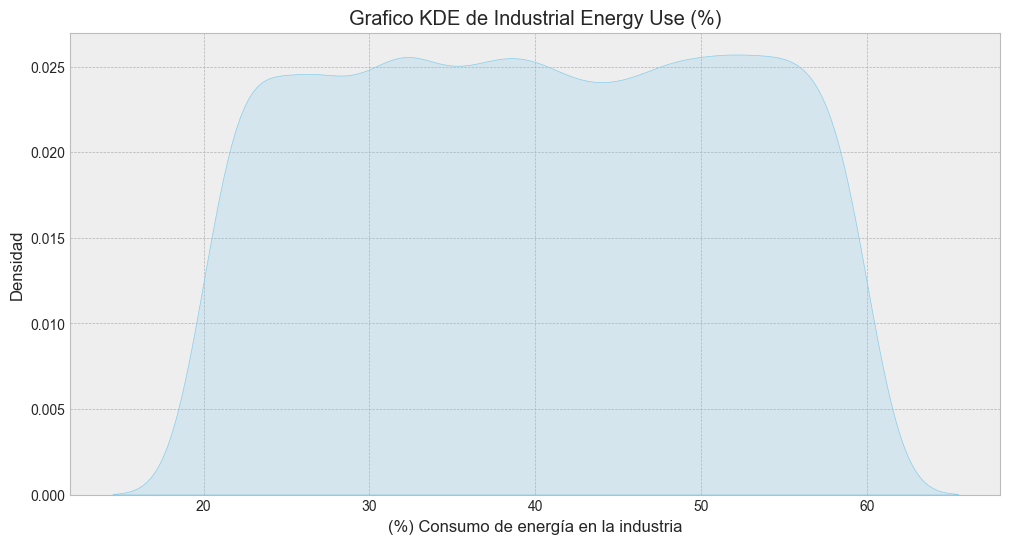

In [48]:
# Gráfico de estimación de densidad de kernel de Industrial Energy Use (%)
viz.crear_grafico_kde(df, 'Industrial Energy Use (%)', '(%) Consumo de energía en la industria', 'Densidad')

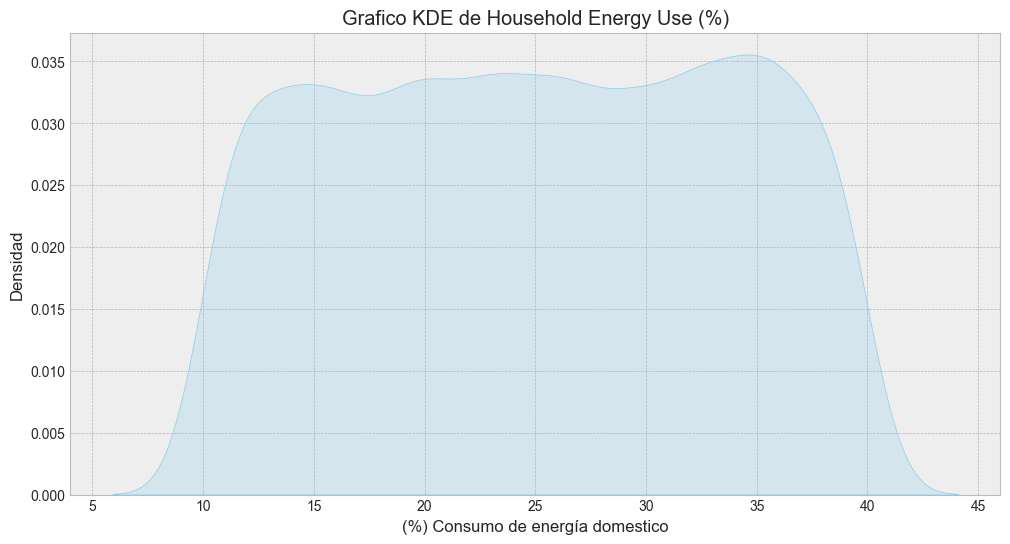

In [49]:
# Gráfico de estimación de densidad de kernel de Household Energy Use (%)
viz.crear_grafico_kde(df, 'Household Energy Use (%)', '(%) Consumo de energía domestico', 'Densidad')

### Hallazgo Clave:

#### La distribución de ambas variables pareciera similar, al menos en el sentido de que existen múltiples valores con la misma densidad. Esto sugiere que, de manera consistente, entre un 12% y un 37% del consumo energético se destina al uso doméstico, mientras que un porcentaje considerable, entre el 22% y el 57%, se emplea en actividades industriales. Lo que muestra una tendencia al uso de energía en el sector industrial, mostrando una importante actividad manufacturera y productiva dentro de sus economías.

#### 5.2. Relación con la Dependencia de Combustibles Fósiles y Energías Renovables

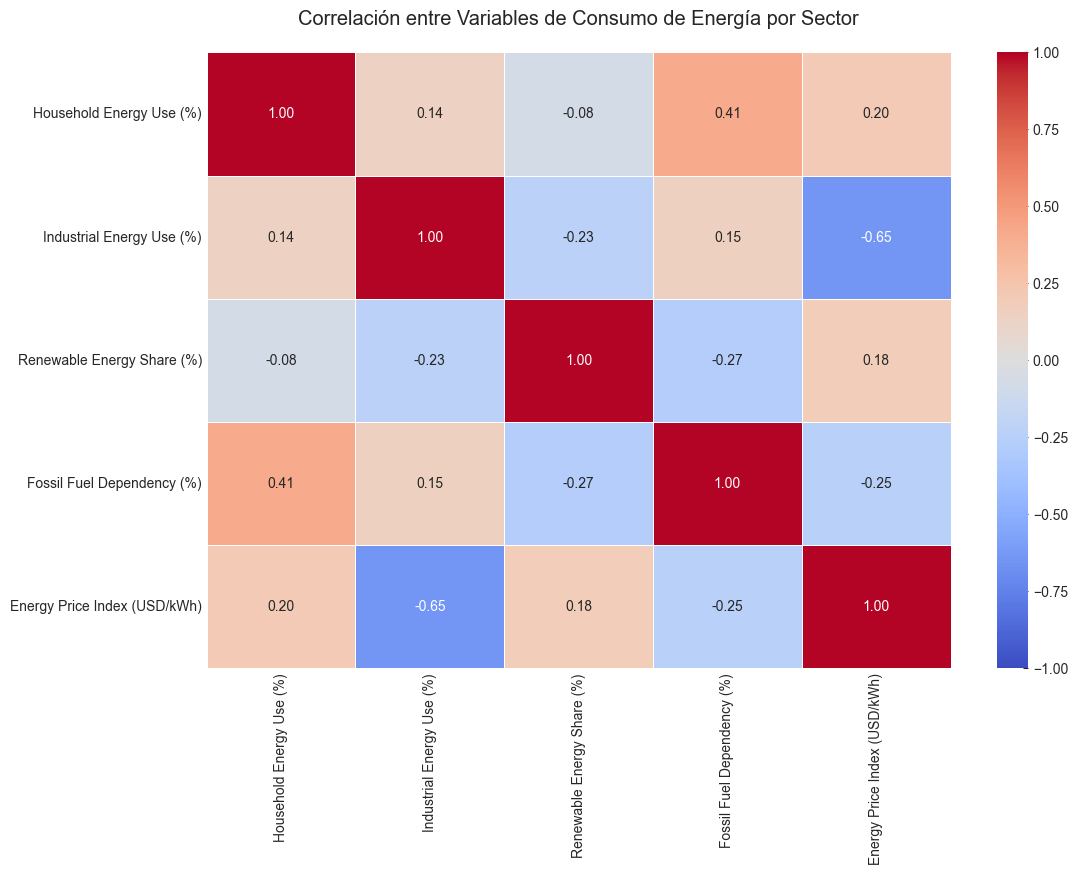

In [50]:
# Cerando un grafico de correlación entre las fuentes tanto renovables como de combustibles fosiles
cols = ['Household Energy Use (%)', 'Industrial Energy Use (%)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Energy Price Index (USD/kWh)']

viz.crear_grafico_correlacion(df, cols, 'Country', 'Correlación entre Variables de Consumo de Energía por Sector')

### Hallazgos Clave:

#### Existe una correlación moderada positiva (41%) entre consumo doméstico y dependencia de combustibles fósiles, lo que indica que los países con mayor proporción de consumo residencial tienden a depender más de fuentes energéticas no renovables.

### Consideración:

- Esta correlación sugiere que las estrategias de transición energética deberían enfocarse particularmente en el sector residencial, donde la dependencia de combustibles fósiles es proporcionalmente significativa.

- El predominio industrial en el consumo energético global (40% promedio vs. 25% doméstico) confirma la necesidad de políticas diferenciadas por sector para lograr una descarbonización efectiva. Pero sin olvidar la seguridad del sistema principalmente respecto de la estabilidad.

#### 5.3. Análisis de Tendencias a lo Largo del Tiempo por Sector

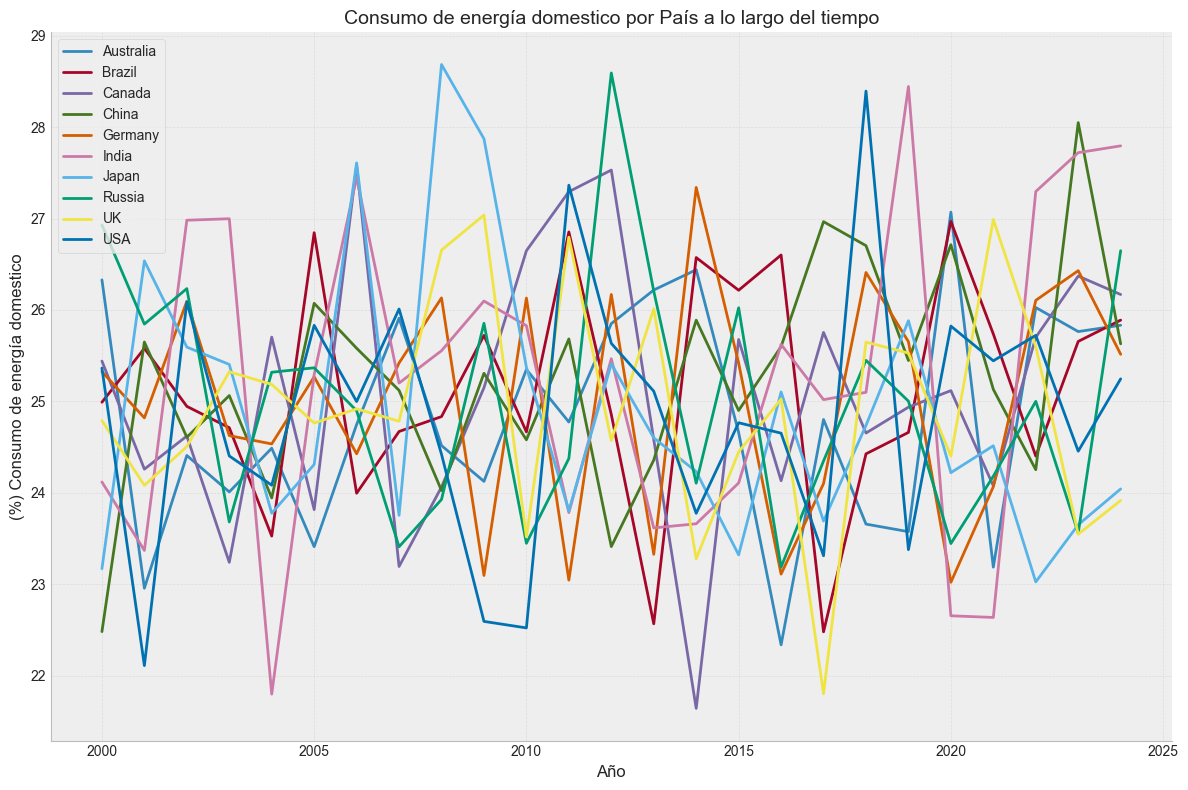

In [51]:
# Creando un gráfico de líneas por país de la métrica Household Energy Use (%)
viz.crear_graf_lineas(df, 'Country', 'Year', 'Household Energy Use (%)', 'Año', '(%) Consumo de energía domestico', 'Consumo de energía domestico por País a lo largo del tiempo')

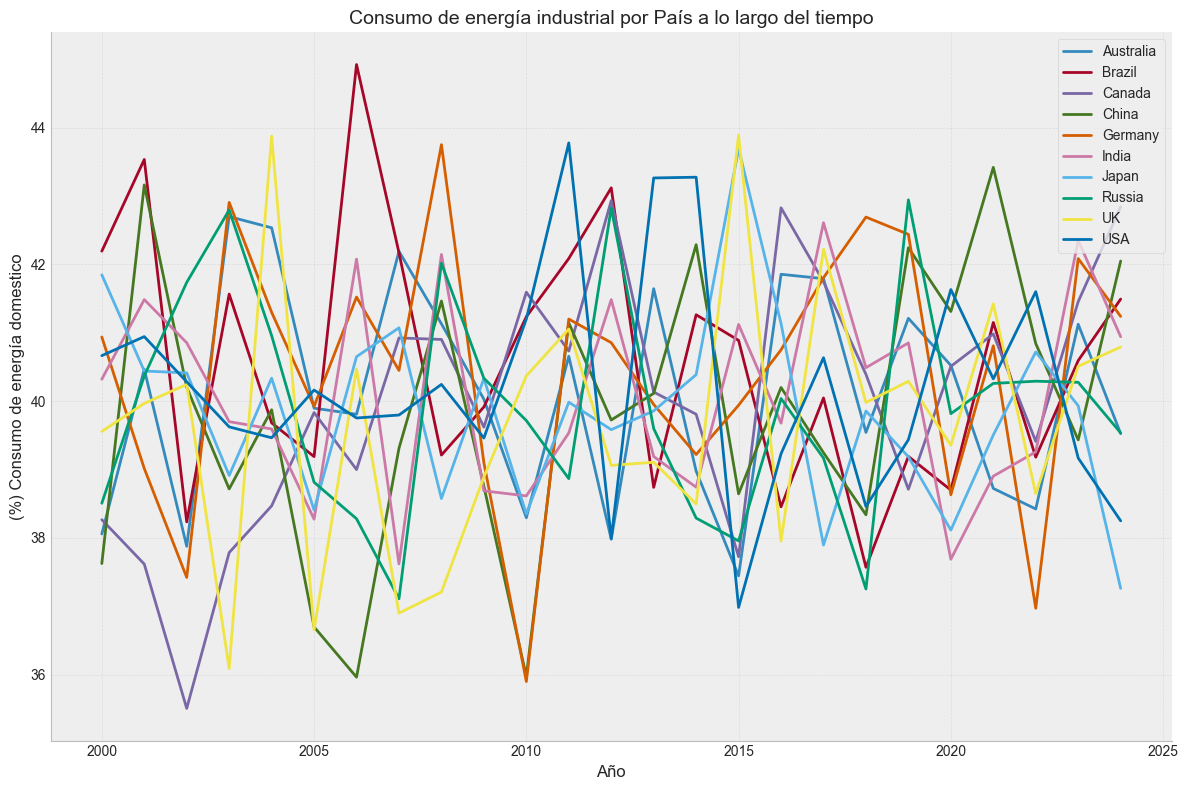

In [52]:
# Creando un gráfico de líneas por país de la métrica Industrial Energy Use (%)
viz.crear_graf_lineas(df, 'Country', 'Year', 'Industrial Energy Use (%)', 'Año', '(%) Consumo de energía domestico', 'Consumo de energía industrial por País a lo largo del tiempo')

#### 5.4. Análisis de la Proporción del Consumo Energético por Sector en cada País

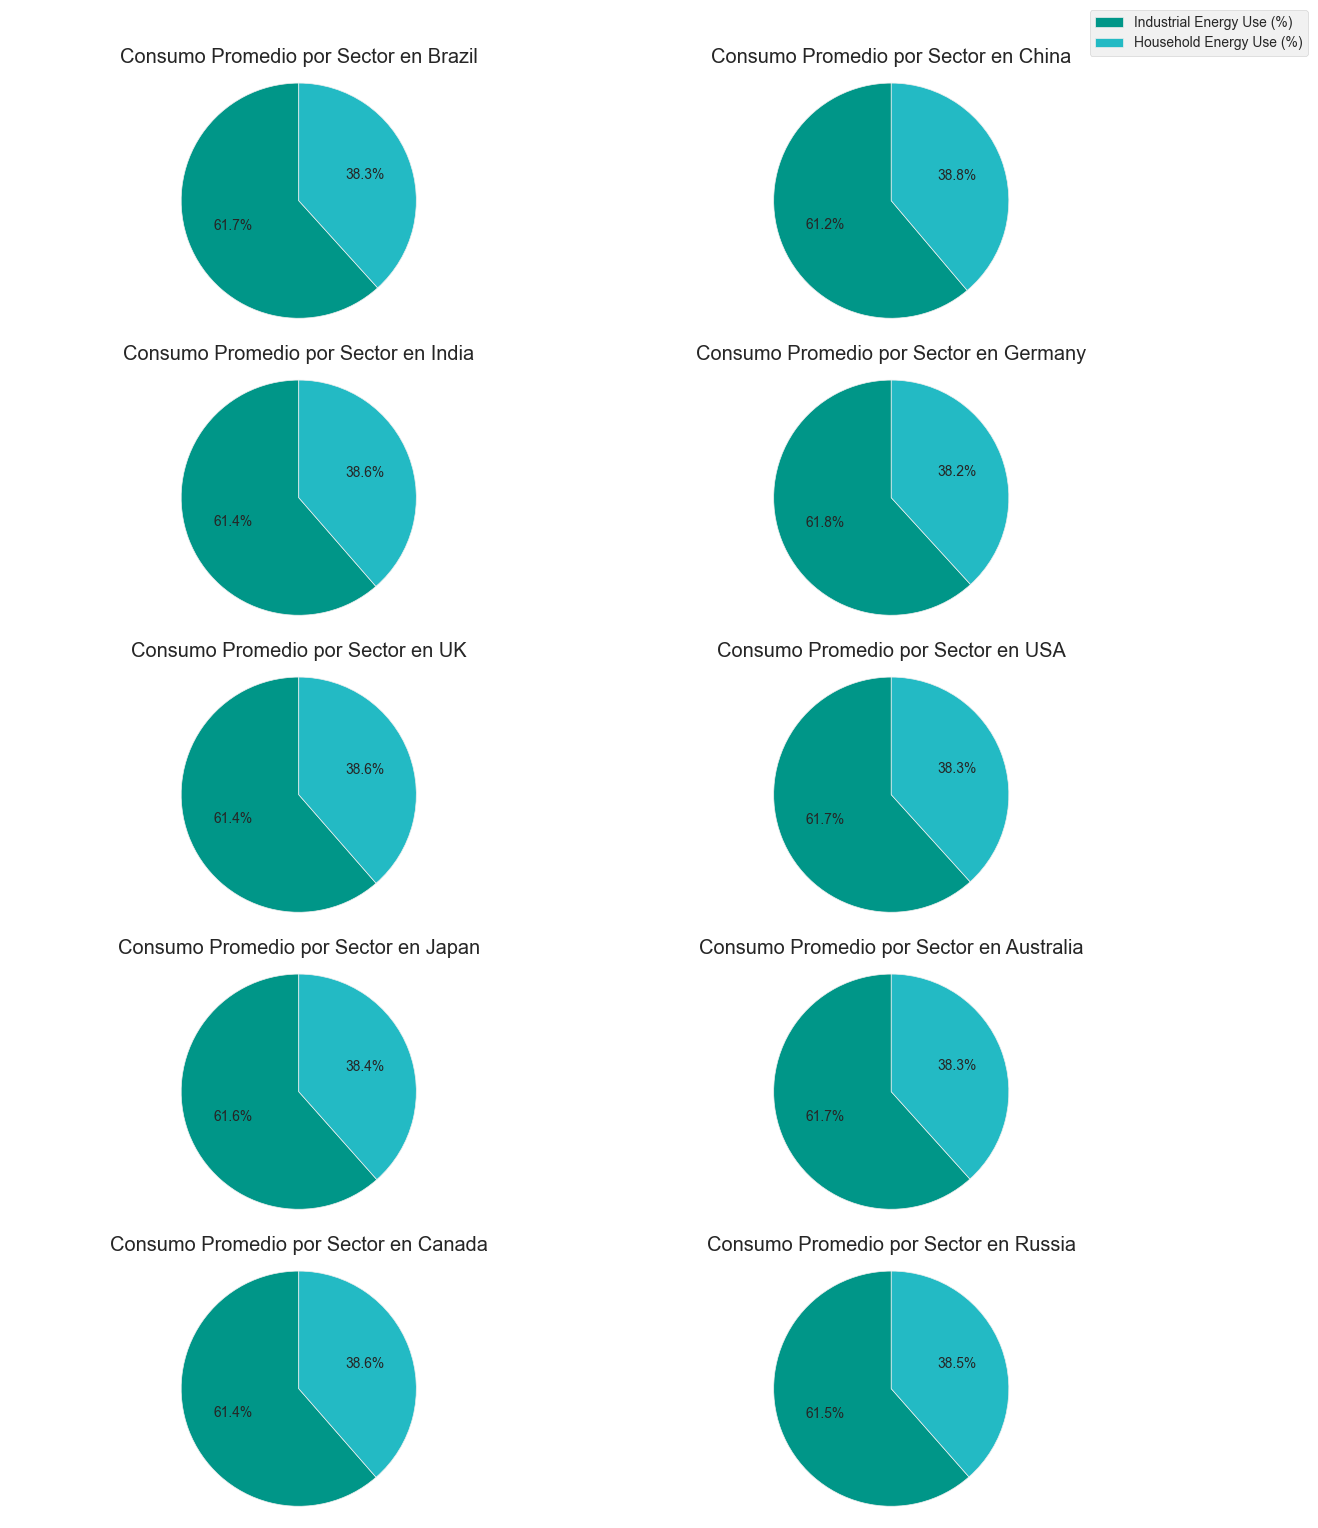

In [53]:
# Creando gráficos de pastel para la distribución de la energía por sector en cada país
viz.crear_grafico_pastel(df, 'Country', 'Industrial Energy Use (%)', 'Household Energy Use (%)', 'Consumo Promedio por Sector en', 5, 2)

## **Evaluación de la Hipótesis planteada para la sección**

---

#### R/ La hipótesis inicial no se sostiene completamente tras el análisis. Si bien existe una relación entre el consumo industrial de energía y el índice de precios de la energía, esta relación parece ser de carácter moderado e inverso. Esto implica que, contrariamente a lo que podría esperarse en un principio, una disminución en el consumo energético por parte del sector industrial tiende a coincidir con un aumento en el índice de precios de la energía. Esta dinámica se ve respaldada por la matriz de correlación, que arroja un coeficiente de -0.65 (o -65%). Este valor indica una correlación negativa de intensidad moderada, sugiriendo que cuando una variable se mueve en una dirección, la otra tiende a hacerlo en la dirección opuesta.

#### Una forma de explicar esto dada la situación donde el consumo industrial disminuya los provedores aumentarian sus costos para mantener sus ganancias, afectando así a los hogares, comercios e industrias.

## **Respuestas a las preguntas de la sección**

#### *¿Qué brecha (en puntos porcentuales) existe entre el uso doméstico y el uso industrial de energía en cada país, y cómo varía dicha brecha a lo largo de la muestra de países?*

---

#### R/Analizando los datos presentados en los gráficos de consumo energético sectorial, se observa una consistente predominancia del uso industrial sobre el doméstico en todos los países estudiados. Las brechas específicas (en puntos porcentuales) son:

| País        | Uso Industrial (%) | Uso Doméstico (%) | Brecha (pp) |
|-------------|--------------------|-------------------|-------------|
| Alemania    | 61.8               | 38.2              | 23.6        |
| Australia   | 61.7               | 38.3              | 23.4        |
| Brasil      | 61.7               | 38.3              | 23.4        |
| Canadá      | 61.4               | 38.6              | 22.8        |
| China       | 61.2               | 38.8              | 22.4        |
| EE.UU.      | 61.7               | 38.3              | 23.4        |
| India       | 61.4               | 38.6              | 22.8        |
| Japón       | 61.6               | 38.4              | 23.2        |
| Reino Unido | 61.4               | 38.6              | 22.8        |
| Rusia       | 61.5               | 38.5              | 23.0        |

#### De los datos mostrados en la tabla se aprecia que la brecha entre consumo industrial y doméstico presenta una variabilidad sorprendentemente baja entre los países analizados, sugiriendo una distribución del consumo energético relativamente homogénea a pesar de las diferencias significativas en sus economías e infraestructuras eléctricas. Si bien las magnitudes absolutas de consumo y la capacidad instalada varían considerablemente entre naciones como Alemania, China, India y el Reino Unido, la proporción relativa entre el uso industrial y doméstico de la energía se mantiene notablemente similar. 

## 6. Conclusiones

- El análisis revela patrones de comportamiento energético que sugieren una influencia significativa del nivel de desarrollo económico en los países del dataset **(Brasil, China, India, Alemania, Reino Unido, Estados Unidos, Japón, Australia, Canadá y Rusia)**. Se observa que las naciones con economías desarrolladas, caracterizadas por su competitividad, solidez económica y avances en múltiples sectores, tienden a exhibir ciertas similitudes en sus patrones de consumo, producción o transición energética. No obstante, es crucial destacar que los países en desarrollo presentes en el conjunto de datos, en lugar de ser completamente uniforme, también demuestran una alta competitividad y, en algunos aspectos puntuales **(Consumo de Energía Per Cápita (kWh), Porcentaje de Energía Renovable, Dependencia de Combustibles Fósiles (%))**, un comportamiento similar al de las economías más avanzadas. Estas convergencias podrían estar impulsadas por factores como la globalización, la adopción de tecnologías similares o la respuesta a desafíos energéticos comunes, como la seguridad de suministro o la mitigación del cambio climático.

- Un aspecto destacable al analizar el último período de datos comprendido entre **2023** y **2024** revela un compromiso significativo con la transición energética por parte de ciertas naciones clave dentro del conjunto de estudio. **Rusia, Alemania y Estados Unidos** se posicionan como líderes al exhibir las cuotas más elevadas de energía renovable en su mix energético. Este liderazgo podría atribuirse a  inversiones estratégicas en infraestructura de energías limpias y una creciente conciencia social y económica sobre los beneficios de la diversificación energética. Dicho aumento del uso de renovables en estos países se ve desde el **gráfico de correlación** donde el aumento de renovables tiene una relación que aunque no es muy fuerte con el **consumo de energía total** y con el **consumo per cápita**, que se comprueba con los **gráficos de líneas** donde en ambas variables **Rusia** está en el top 3 y con la aparición de **USA** en el consumo per cápita en el top 3. 

- Los **precios de la energía** no solo tiene que ver con el uso de una u otra tecnología, sino que de acuerdo al gráfico de correlación están moderadamente relacionados con el consumo per cápita **(+0.46)**, que cumple con la ley de la oferta y demanda donde a mayor demanda más se encarece el producto, por otro lado, se presenta una relación moderada con las emisiones de carbono **(+0.41)**, que podría deberse a uso de plantas antiguas que resultan mucho más costosas y menos eficientes por lo que se produce el aumento en los precios.



## 7. Referencias

- dataset: https://www.kaggle.com/datasets/atharvasoundankar/global-energy-consumption-2000-2024    
- Metodologías aplicadas:
    - **Análisis univariante**: Estudio de distribuciones mediante histogramas y gráficos KDE para identificar distribuciones multimodales y platicúrticas en variables como consumo energético.
    - **Análisis bivariante**: Correlaciones entre pares de variables energéticas, identificando relaciones entre consumo, emisiones y fuentes energéticas.
    - **Series temporales**: Estudio de la evolución temporal de indicadores energéticos utilizando gráficos de líneas por país.
    - **análisis comparativo con boxplots**: Estudio comparativo de la distribución de una misma variable cuantitativa entre diferentes paises.
- Estudios relacionados:

    - https://github.com/kaggle/docker-python